# **GROUP NUMBER: 6442**

# **MScFE 652 RISK MANAGEMENT**

**Group Work Project # 1**

# **Tasks**

# **Step 1 & Step 2**

The problem that the thesis attempts to solve is the problem of underlying factors driving crude oil prices. Apart from predicting prices, it is also necessary to understand how crude oil prices react to hypothetical scenarios like geopolitical tensions or sudden changes in supply. Therefore, the thesis attempts to solve this problem by performing stress tests and evaluating the robustness of the model under extreme conditions.

Bayesian networks are suitable for solving the problem of underlying factors driving crude oil prices because it can combine a lot of variables to find the dependencies between them and successfully extrapolate the data thanks to the learned knowledge. This method applies probabilistic reasoning and can be dynamically adapted towards an ever changing world.  Bayesian networks models casual relationships between variables which allows for effective stress testing by simulating the impact of different hypothetical situations on crude oil prices.

The main advantage is that it lets us introduce prior knowledge that could be either expert-based or extracted from  other models and put it into the decision process. As  compared to traditional time-series models that might overlook the complex interactions like the underlying factors driving crude oil prices, bayesian networks provide more accurate and reliable forecasts.

# **Step 3**  Student A

In [1]:
!pip install fredapi
!pip install hmms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.8/524.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.7 MB/s eta 0:00:00
  Created wheel for hmms: filename=hmms-0.2.3-cp310-cp310-linux_x86_64.whl size=2152616 sha256=06160f72bea8bab201c598c6c29a64cb06b43c03cb3fe901a7d71824cc25306b
  Stored in directory: /root/.cache/pip/wheels/aa/6f/a4/1dbae244341f24881dce9465aa533729d2ae870cff3866070f
Successfully built hmms


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [3]:
from fredapi import Fred
# FRED API key
fred_key = "f9c22fca078ece81a7a2ac6fba29b8a9";
# Initiates a session with the FRED datacenter to recieve datasets
fred = Fred(api_key=fred_key);
# Retrieve data from FRED API
fred_data = pd.DataFrame(fred.get_series('WTISPLC'), columns=['WTISPLC'])

# EDA

In [4]:
datasets_fred = [
'WTISPLC',    # Spot Crude Oil Price: West Texas Intermediate (WTI) (WTISPLC)
'CPIENGSL', # Consumer Price Index for All Urban Consumers: Energy in U.S. City Average
'CAPG211S', # Industrial Capacity: Mining: Oil and Gas Extraction (NAICS = 211)
'CAPUTLG211S', #  Capacity Utilization: Mining: Oil and Gas Extraction (NAICS = 211)
'IPG211S', # Industrial Production Index: Mining: Oil and Gas Extraction (NAICS = 211)
'INDPRO', #  Industrial Production: Total Index
'IPN213111N', # Industrial Production: Mining: Drilling Oil and Gas Wells
'PCU211211', # Producer Price Index: Mining: Oil and Gas Extraction (NAICS = 211)
                ];

data_frames = []; # List of dataframes to be concatenated

# Adding FRED datasets
for series_id in datasets_fred:
  # Get series from FRED
  df = pd.DataFrame(fred.get_series(series_id), columns=[series_id]);
  data_frames.append(df);

data_merge = pd.concat(data_frames, axis=1)
#data_merge = data_merge[data_merge.index > '2000-01-01']
data_merge.head()

WTISPLC  CPIENGSL  CAPG211S  CAPUTLG211S  IPG211S  INDPRO  \
1919-01-01      NaN       NaN       NaN          NaN      NaN  4.8654   
1919-02-01      NaN       NaN       NaN          NaN      NaN  4.6504   
1919-03-01      NaN       NaN       NaN          NaN      NaN  4.5160   
1919-04-01      NaN       NaN       NaN          NaN      NaN  4.5966   
1919-05-01      NaN       NaN       NaN          NaN      NaN  4.6235   

            IPN213111N  PCU211211  
1919-01-01         NaN        NaN  
1919-02-01         NaN        NaN  
1919-03-01         NaN        NaN  
1919-04-01         NaN        NaN  
1919-05-01         NaN        NaN

In [5]:
data_merge.isnull().sum()

WTISPLC        324
CPIENGSL       456
CAPG211S       637
CAPUTLG211S    637
IPG211S        637
INDPRO           1
IPN213111N     637
PCU211211      804
dtype: int64

In [6]:
data_merge.describe().T

count        mean        std      min      25%       50%  \
WTISPLC       942.0   27.816605  29.284847   1.1700   3.0000   18.3125   
CPIENGSL      810.0  114.829889  80.335992  21.3000  31.7500  101.5000   
CAPG211S      629.0   81.421457  21.937600  61.4822  66.6233   76.3514   
CAPUTLG211S   629.0   93.202929   3.239208  78.6360  91.5201   93.1402   
IPG211S       629.0   76.173594  22.164265  48.8141  62.4444   68.5466   
INDPRO       1265.0   45.891390  34.813005   3.6827  13.7629   39.1057   
IPN213111N    629.0  130.404341  53.132521  47.9947  94.0882  113.9683   
PCU211211     462.0  154.771381  83.664228  54.6000  77.3750  138.1500   

                   75%       max  
WTISPLC       39.34000  133.9300  
CPIENGSL     192.18225  331.7380  
CAPG211S      81.75120  149.2870  
CAPUTLG211S   94.95650  101.5441  
IPG211S       78.22200  144.4211  
INDPRO        84.15640  104.1038  
IPN213111N   156.98800  334.6264  
PCU211211    221.97500  490.4000


# **Step 3**  Student C

Identified that the financial data on securities and markets that affect the price of oil are:
1. Canadian dollar to US dollar exchange rate
2. CBOE crude oil futures
3. WTI crude oil futures
4. Brent crude oil futures
5. S&P500

Importing, structuring and graphing the financial data on securities and markets that affect the price of oil.

In [7]:
from fredapi import Fred
# FRED API key
fred_key = "f9c22fca078ece81a7a2ac6fba29b8a9";
# Initiates a session with the FRED datacenter to recieve datasets
fred = Fred(api_key=fred_key);
# Retrieve data from FRED API
fred_data = pd.DataFrame(fred.get_series('DEXCAUS'), columns=['DEXCAUS'])

In [8]:
financial_datasets_fred = [
'DEXCAUS', #Canadian dollar to US dollar exchange rate
'VIXCLS', #CBOE Volatility Index
'DCOILWTICO', #WTI Crude oil futures
'DCOILBRENTEU', #Brent crude oil futures
'SP500', #S&P500 Index
];

finan_data_frames = []; # List of dataframes to be concatenated

# Adding FRED datasets
for series_id in financial_datasets_fred:
  # Get series from FRED
  df = pd.DataFrame(fred.get_series(series_id), columns=[series_id]);
  finan_data_frames.append(df);

fin_data = pd.concat(finan_data_frames, axis=1)
#fin_data = data_merge[fin_data.index > '2000-01-01']
fin_data.head()

DEXCAUS  VIXCLS  DCOILWTICO  DCOILBRENTEU  SP500
1971-01-04   1.0109     NaN         NaN           NaN    NaN
1971-01-05   1.0102     NaN         NaN           NaN    NaN
1971-01-06   1.0106     NaN         NaN           NaN    NaN
1971-01-07   1.0148     NaN         NaN           NaN    NaN
1971-01-08   1.0154     NaN         NaN           NaN    NaN

In [9]:
fin_data.isnull().sum()

DEXCAUS           539
VIXCLS           5253
DCOILWTICO       4264
DCOILBRENTEU     4541
SP500           11448
dtype: int64

In [51]:
fin_data.describe().T

count         mean         std        min        25%  \
DEXCAUS       13425.0     1.229735    0.160415     0.9168     1.1035   
VIXCLS         8711.0    19.491915    7.879984     9.1400    13.7950   
DCOILWTICO     9700.0    47.291728   29.700010   -36.9800    20.1500   
DCOILBRENTEU   9423.0    49.936190   32.927056     9.1000    19.2800   
SP500          2516.0  3177.629996  979.254402  1829.0800  2268.9750   

                    50%        75%        max  
DEXCAUS          1.2353     1.3474     1.6128  
VIXCLS          17.6300    22.8700    82.6900  
DCOILWTICO      39.2800    70.9425   145.3100  
DCOILBRENTEU    42.7200    74.2300   143.9500  
SP500         2890.6550  4090.4225  5633.9100

# **Step 4**

Dictionary of Macroeconomic data

In [11]:
start_date = data_merge.index.min()
end_date = data_merge.index.max()


macro_data_info = {
    'WTISPLC': {
        'description': 'Oil Price',
        'frequency': 'Monthly',
        'source': 'FRED',
        'start_date': start_date,
        'end_date': end_date
    },
    'CPIENGSL': {
        'description': 'Consumer Price Index for All Urban Consumers: Energy in U.S. City Average',
        'frequency': 'Monthly',
        'source': 'FRED',
        'start_date': start_date,
        'end_date': end_date
    },
    'CAPG211S': {
        'description': 'Industrial Capacity: Mining: Oil and Gas Extraction',
        'frequency': 'Monthly',
        'source': 'FRED',
        'start_date': start_date,
        'end_date': end_date
    },
    'CAPUTLG211S': {
        'description': 'Capacity Utilization: Mining: Oil and Gas Extraction',
        'frequency': 'Monthly',
        'source': 'FRED',
        'start_date': start_date,
        'end_date': end_date
    },
    'IPG211S': {
        'description': 'Industrial Production Index: Mining: Oil and Gas Extraction',
        'frequency': 'Monthly',
        'source': 'FRED',
        'start_date': start_date,
        'end_date': end_date
    },
    'INDPRO': {
        'description': 'Industrial Production: Total Index',
        'frequency': 'Monthly',
        'source': 'FRED',
        'start_date': start_date,
        'end_date': end_date
    },
    'IPN213111N': {
        'description': 'Industrial Production: Mining: Drilling Oil and Gas Wells',
        'frequency': 'Monthly',
        'source': 'FRED',
        'start_date': start_date,
        'end_date': end_date
    },
    'PCU211211': {
        'description': 'Producer Price Index: Mining: Oil and Gas Extraction',
        'frequency': 'Monthly',
        'source': 'FRED',
        'start_date': start_date,
        'end_date': end_date
    }
}

macro_data_info_list = [
    ['WTISPLC', 'Spot Crude Oil Price: West Texas Intermediate (WTI)', 'Monthly', 'FRED', start_date, end_date],
    ['CPIENGSL', 'Consumer Price Index for All Urban Consumers: Energy in U.S. City Average', 'Monthly', 'FRED', start_date, end_date],
    ['CAPG211S', 'Industrial Capacity: Mining: Oil and Gas Extraction', 'Monthly', 'FRED', start_date, end_date],
    ['CAPUTLG211S', 'Capacity Utilization: Mining: Oil and Gas Extraction', 'Monthly', 'FRED', start_date, end_date],
    ['IPG211S', 'Industrial Production Index: Mining: Oil and Gas Extraction', 'Monthly', 'FRED', start_date, end_date],
    ['INDPRO', 'Industrial Production: Total Index', 'Monthly', 'FRED', start_date, end_date],
    ['IPN213111N', 'Industrial Production: Total Index', 'Monthly', 'FRED', start_date, end_date],
    ['PCU211211', 'Producer Price Index: Mining: Oil and Gas Extraction', 'Monthly', 'FRED', start_date, end_date]
]

macro_data_info = pd.DataFrame(macro_data_info_list, columns=['Ticker',
                                                              'Description',
                                                              'Frequency',
                                                              'Source',
                                                              'Start Date',
                                                              'End Date'])

macro_data_info


Ticker                                        Description Frequency  \
0      WTISPLC  Spot Crude Oil Price: West Texas Intermediate ...   Monthly   
1     CPIENGSL  Consumer Price Index for All Urban Consumers: ...   Monthly   
2     CAPG211S  Industrial Capacity: Mining: Oil and Gas Extra...   Monthly   
3  CAPUTLG211S  Capacity Utilization: Mining: Oil and Gas Extr...   Monthly   
4      IPG211S  Industrial Production Index: Mining: Oil and G...   Monthly   
5       INDPRO                 Industrial Production: Total Index   Monthly   
6   IPN213111N                 Industrial Production: Total Index   Monthly   
7    PCU211211  Producer Price Index: Mining: Oil and Gas Extr...   Monthly   

  Source Start Date   End Date  
0   FRED 1919-01-01 2024-06-01  
1   FRED 1919-01-01 2024-06-01  
2   FRED 1919-01-01 2024-06-01  
3   FRED 1919-01-01 2024-06-01  
4   FRED 1919-01-01 2024-06-01  
5   FRED 1919-01-01 2024-06-01  
6   FRED 1919-01-01 2024-06-01  
7   FRED 1919-01-01 2024-06-01

Dictionary of the financial data:

In [12]:
start_date = fin_data.index.min()
end_date = fin_data.index.max()

print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 1971-01-04 00:00:00
End Date: 2024-07-11 00:00:00


In [13]:
data_info = {
    'DEXCAUS': {
        'description': 'Canadian dollar to US dollar exchange rate',
        'frequency': 'Daily',
        'source': 'FRED',
        'start_date': start_date,
        'end_date': end_date
    },
    'VIXCLS': {
        'description': 'CBOE Volatility Index',
        'frequency': 'Daily',
        'source': 'FRED',
        'start_date': start_date,
        'end_date': end_date
    },
    'DCOILWTICO': {
        'description': 'WTI Crude oil futures',
        'frequency': 'Daily',
        'source': 'FRED',
        'start_date': start_date,
        'end_date': end_date
    },
    'DCOILBRENTEU': {
        'description': 'Brent crude oil futures',
        'frequency': 'Daily',
        'source': 'FRED',
        'start_date': start_date,
        'end_date': end_date
    },
    'SP500-45': {
        'description': 'S&P 500 Energy sector index',
        'frequency': 'Daily',
        'source': 'FRED',
        'start_date': start_date,
        'end_date': end_date
    },
    'SP500': {
        'description': 'S&P500 Index',
        'frequency': 'Daily',
        'source': 'FRED',
        'start_date': start_date,
        'end_date': end_date
    }
}

# Print the dictionary
for key, value in data_info.items():
    print(f"{key}: {value}")


DEXCAUS: {'description': 'Canadian dollar to US dollar exchange rate', 'frequency': 'Daily', 'source': 'FRED', 'start_date': Timestamp('1971-01-04 00:00:00'), 'end_date': Timestamp('2024-07-11 00:00:00')}
VIXCLS: {'description': 'CBOE Volatility Index', 'frequency': 'Daily', 'source': 'FRED', 'start_date': Timestamp('1971-01-04 00:00:00'), 'end_date': Timestamp('2024-07-11 00:00:00')}
DCOILWTICO: {'description': 'WTI Crude oil futures', 'frequency': 'Daily', 'source': 'FRED', 'start_date': Timestamp('1971-01-04 00:00:00'), 'end_date': Timestamp('2024-07-11 00:00:00')}
DCOILBRENTEU: {'description': 'Brent crude oil futures', 'frequency': 'Daily', 'source': 'FRED', 'start_date': Timestamp('1971-01-04 00:00:00'), 'end_date': Timestamp('2024-07-11 00:00:00')}
SP500-45: {'description': 'S&P 500 Energy sector index', 'frequency': 'Daily', 'source': 'FRED', 'start_date': Timestamp('1971-01-04 00:00:00'), 'end_date': Timestamp('2024-07-11 00:00:00')}
SP500: {'description': 'S&P500 Index', 'fre

Table showing the financial data

In [14]:


data_info_list = [
    ['DEXCAUS', 'Canadian dollar to US dollar exchange rate', 'Daily', 'FRED', start_date, end_date],
    ['VIXCLS', 'CBOE Volatility Index', 'Daily', 'FRED', start_date, end_date],
    ['DCOILWTICO', 'WTI Crude oil futures', 'Daily', 'FRED', start_date, end_date],
    ['DCOILBRENTEU', 'Brent crude oil futures', 'Daily', 'FRED', start_date, end_date],
    ['SP500-45', 'S&P 500 Energy sector index', 'Daily', 'FRED', start_date, end_date],
    ['SP500', 'S&P500 Index', 'Daily', 'FRED', start_date, end_date]
]

data_info_df = pd.DataFrame(data_info_list, columns=['Ticker', 'Description', 'Frequency', 'Source', 'Start Date', 'End Date'])


data_info_df


Ticker                                 Description Frequency Source  \
0       DEXCAUS  Canadian dollar to US dollar exchange rate     Daily   FRED   
1        VIXCLS                       CBOE Volatility Index     Daily   FRED   
2    DCOILWTICO                       WTI Crude oil futures     Daily   FRED   
3  DCOILBRENTEU                     Brent crude oil futures     Daily   FRED   
4      SP500-45                 S&P 500 Energy sector index     Daily   FRED   
5         SP500                                S&P500 Index     Daily   FRED   

  Start Date   End Date  
0 1971-01-04 2024-07-11  
1 1971-01-04 2024-07-11  
2 1971-01-04 2024-07-11  
3 1971-01-04 2024-07-11  
4 1971-01-04 2024-07-11  
5 1971-01-04 2024-07-11

# **Step 5**

# Removing Outliers

Macroeconomic Data



The lower bound value is -60.037936242848204
The upper bound value is 115.67114643393101
Total number of outliers are 4
The lower bound value is -126.1780877872839
The upper bound value is 355.83786556506163
Total number of outliers are 0
The lower bound value is 15.608656858545089
The upper bound value is 147.23425697293345
Total number of outliers are 6


<ipython-input-15-238fc34c1aa0>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_merge[col], kde=False)


The lower bound value is 83.48530555873768
The upper bound value is 102.92055199293165
Total number of outliers are 5
The lower bound value is 9.680800381005028
The upper bound value is 142.6663878542891
Total number of outliers are 9
The lower bound value is -58.54762458917536
The upper bound value is 150.33040419391844
Total number of outliers are 0
The lower bound value is -28.99322264970334
The upper bound value is 289.8019050026445
Total number of outliers are 12
The lower bound value is -96.22130158117326
The upper bound value is 405.76406348593514
Total number of outliers are 3


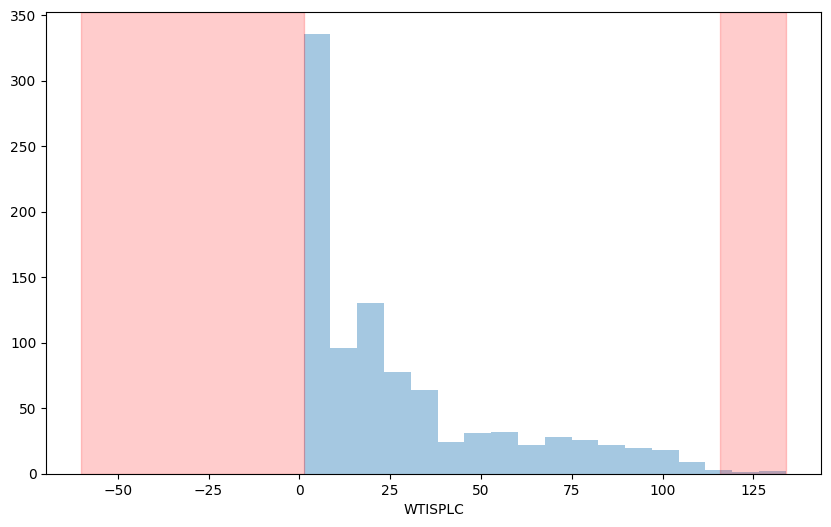

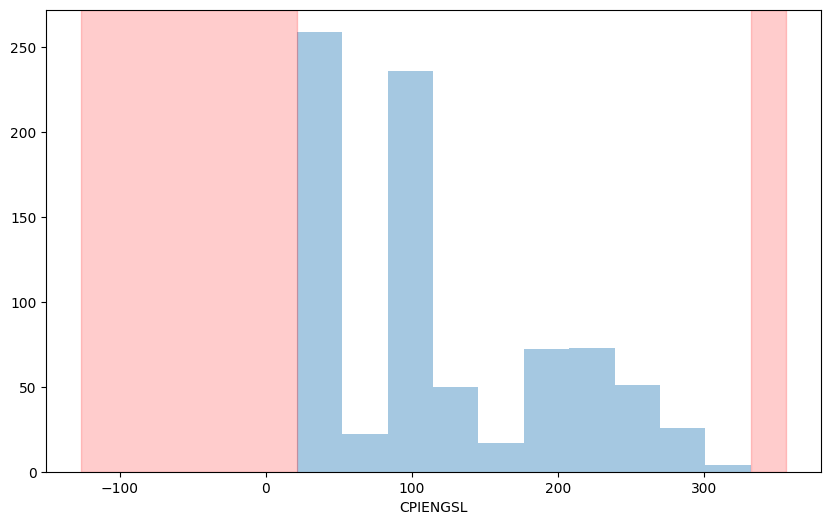

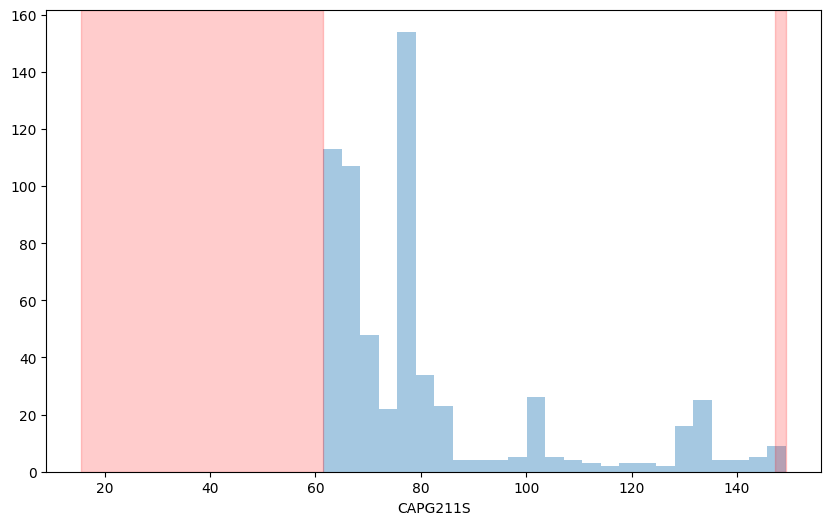

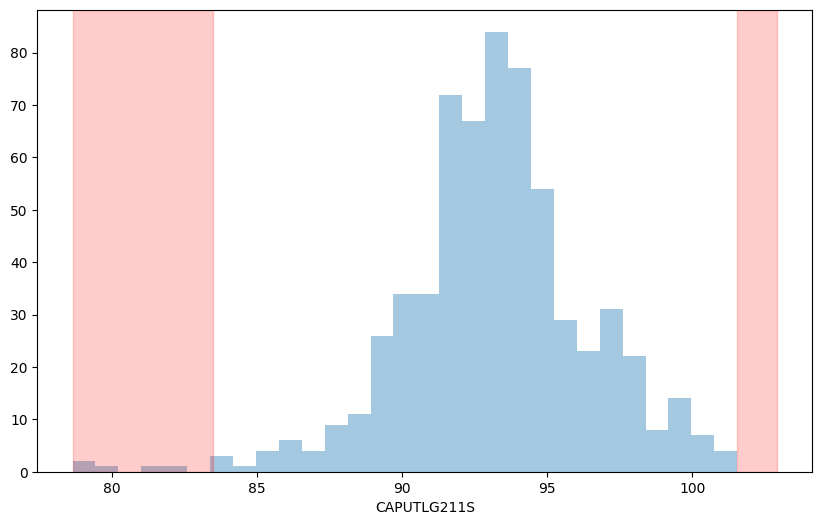

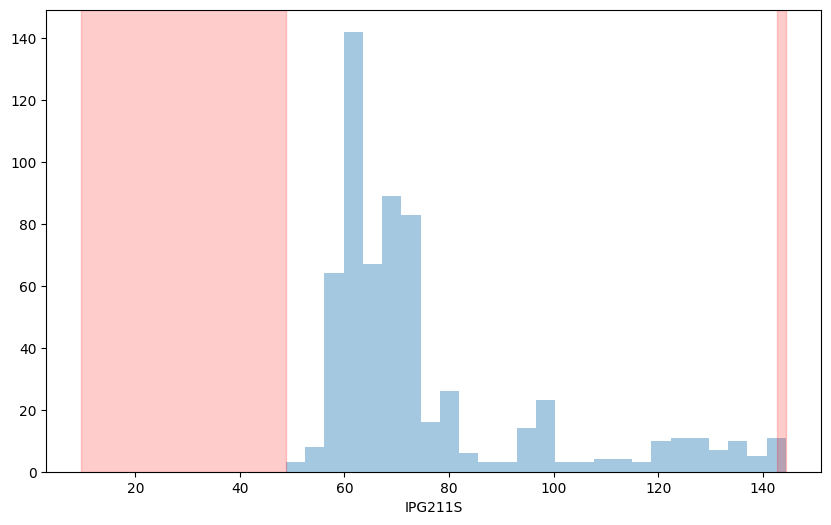

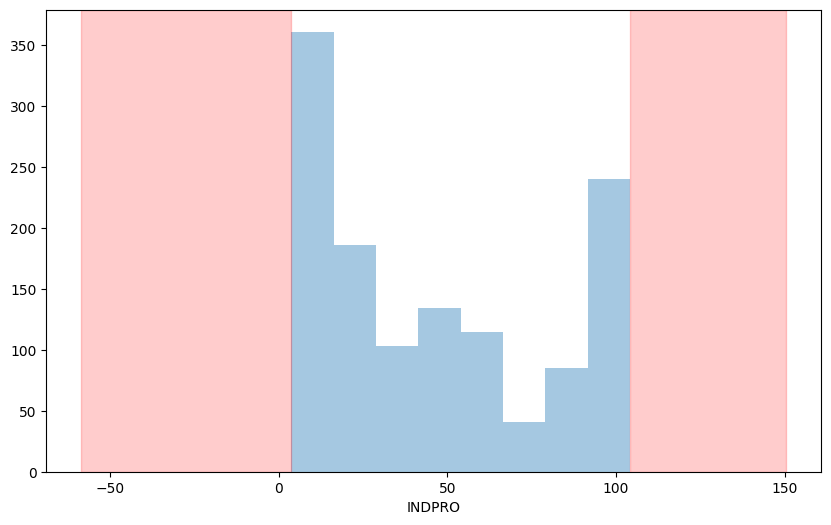

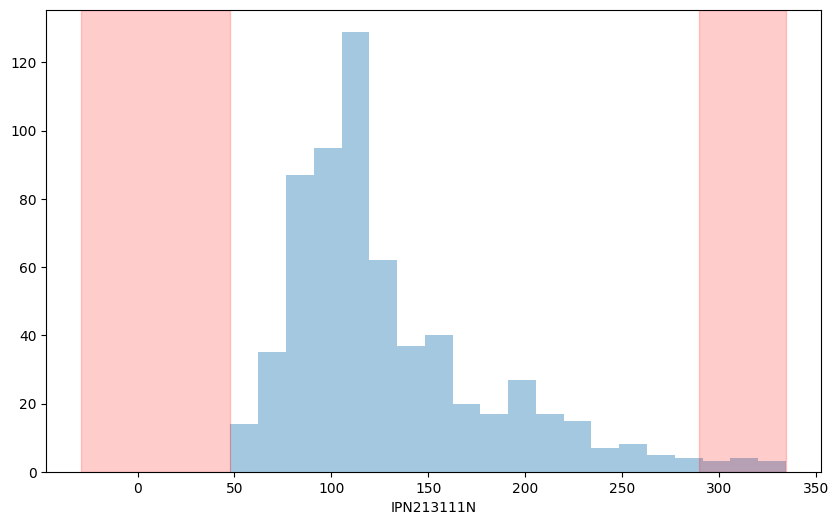

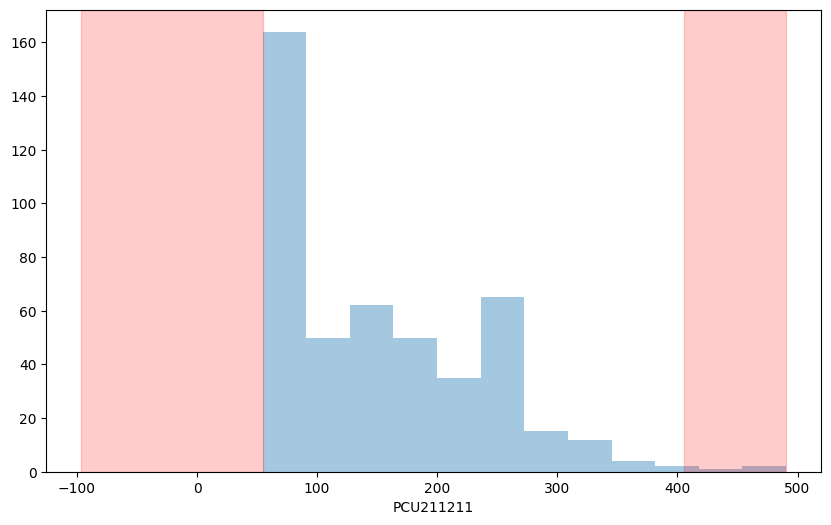

In [15]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

for col in data_merge.columns:
    out_std(data_merge, col)

    plt.figure(figsize = (10,6))
    sns.distplot(data_merge[col], kde=False)
    plt.axvspan(xmin = lower,xmax= data_merge[col].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= data_merge[col].max(),alpha=0.2, color='red')





The lower bound value is -40.082532829843636
The upper bound value is 133.40170930043186
Total number of outliers are 0
The lower bound value is -23.57509455720819
The upper bound value is 357.58868061385306
Total number of outliers are 0
The lower bound value is 6.15368154560106
The upper bound value is 159.17391540429003
Total number of outliers are 0
The lower bound value is 82.76136514142729
The upper bound value is 104.20412113308254
Total number of outliers are 5
The lower bound value is 0.5550927639357894
The upper bound value is 154.7436218330141
Total number of outliers are 0


<ipython-input-16-d512fc6a9f76>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[col], kde=False)


The lower bound value is 39.572396006374206
The upper bound value is 133.53064015920313
Total number of outliers are 0
The lower bound value is 23.142984182915242
The upper bound value is 196.66759620924165
Total number of outliers are 0
The lower bound value is -87.6888973772983
The upper bound value is 393.2304137171676
Total number of outliers are 0


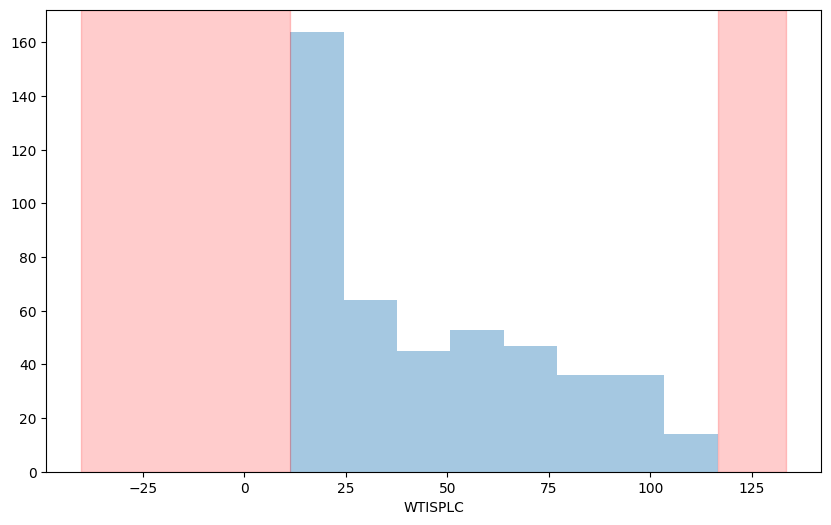

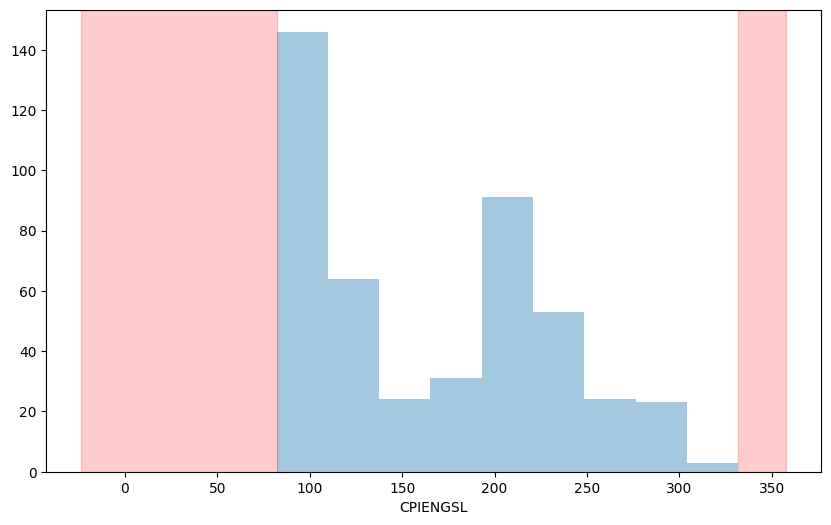

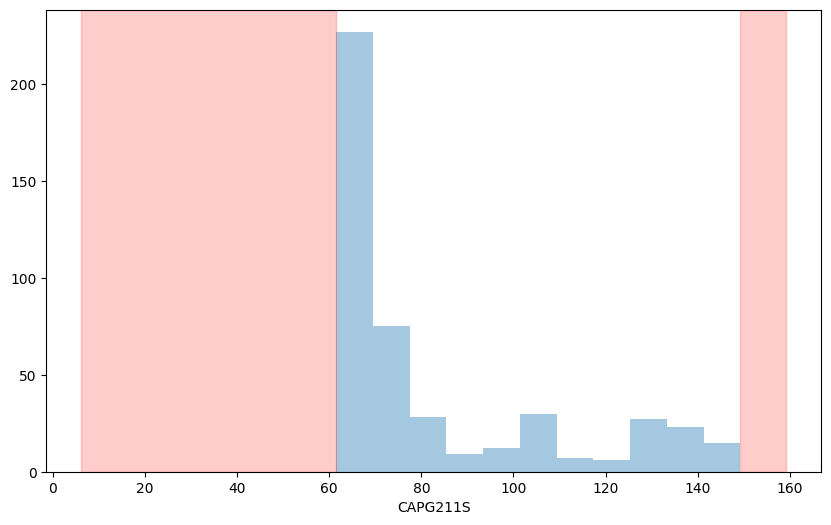

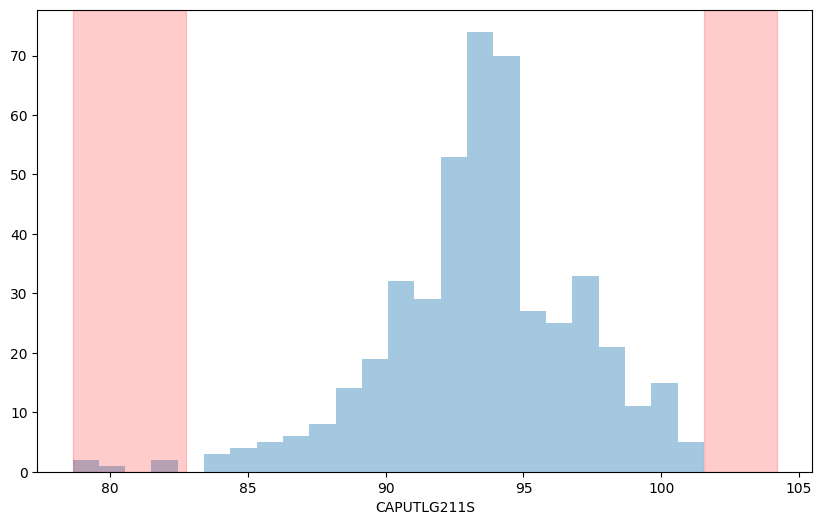

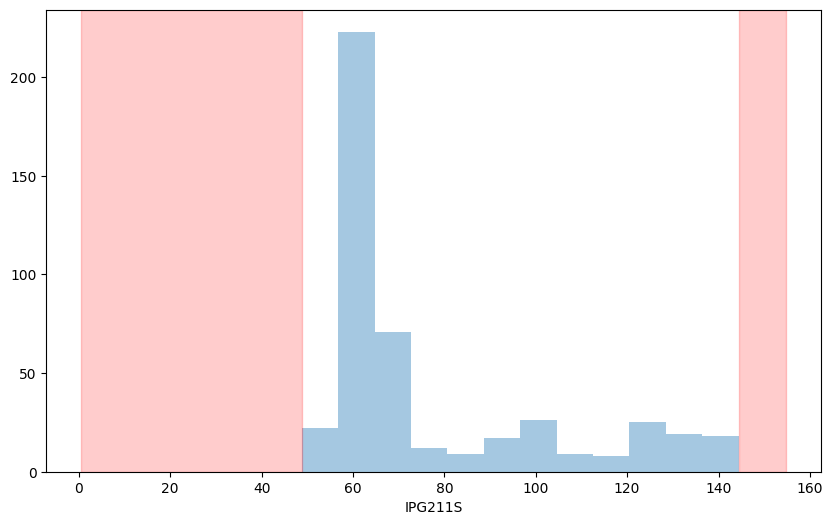

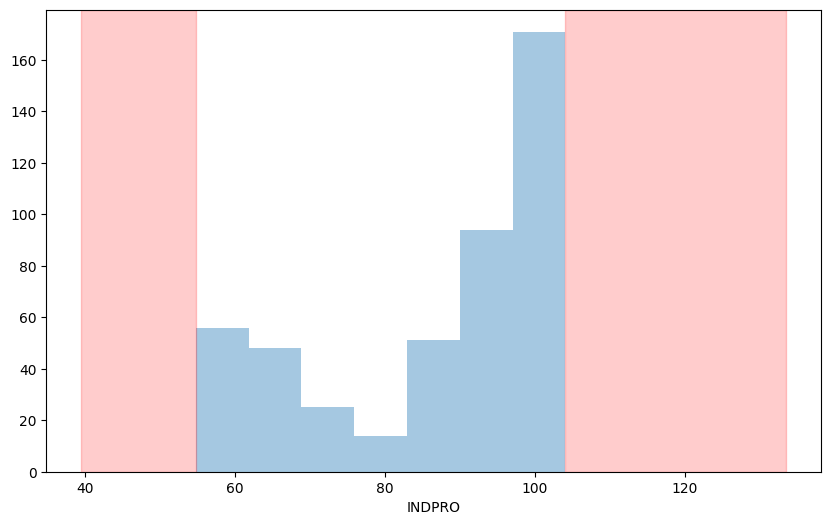

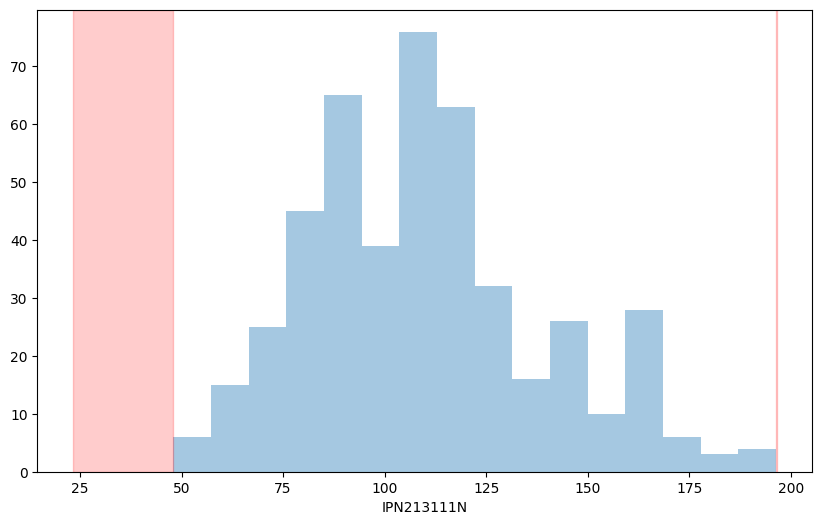

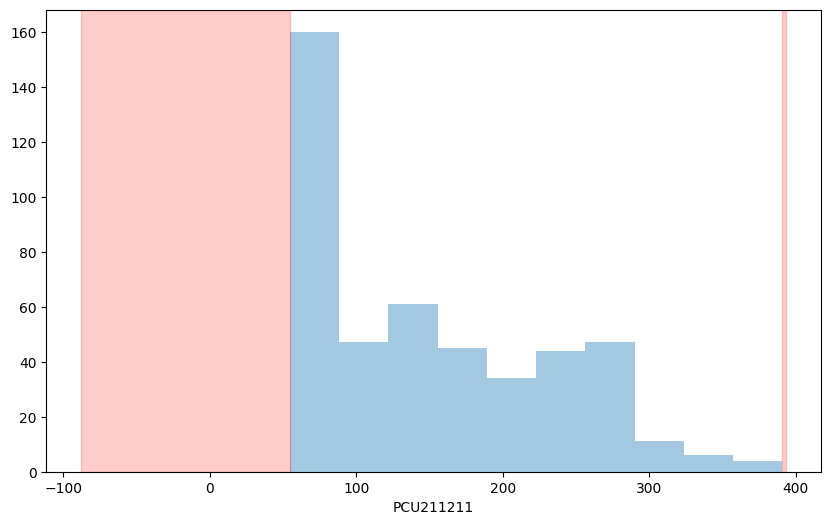

In [16]:
df_new = pd.DataFrame()

for col in data_merge.columns:
    #Data Frame without outliers
    df_new = data_merge[(data_merge[col] > lower)  & (data_merge[col] < upper) ]

for col in df_new.columns:
    out_std(df_new, col)

    plt.figure(figsize = (10,6))
    sns.distplot(df_new[col], kde=False)
    plt.axvspan(xmin = lower,xmax= df_new[col].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= df_new[col].max(),alpha=0.2, color='red')

Financial Data

The lower bound value is 0.7484901853824507
The upper bound value is 1.7109794459024652
Total number of outliers are 0
The lower bound value is -4.148036317968636
The upper bound value is 43.131865958652824
Total number of outliers are 142
The lower bound value is -41.80830253900812
The upper bound value is 136.3917582091112
Total number of outliers are 16


<ipython-input-17-a4129b99bc3f>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fin_data[col], kde=False)


The lower bound value is -48.84497754215096
The upper bound value is 148.71735788811296
Total number of outliers are 0
The lower bound value is 239.8667915078745
The upper bound value is 6115.393200543
Total number of outliers are 0


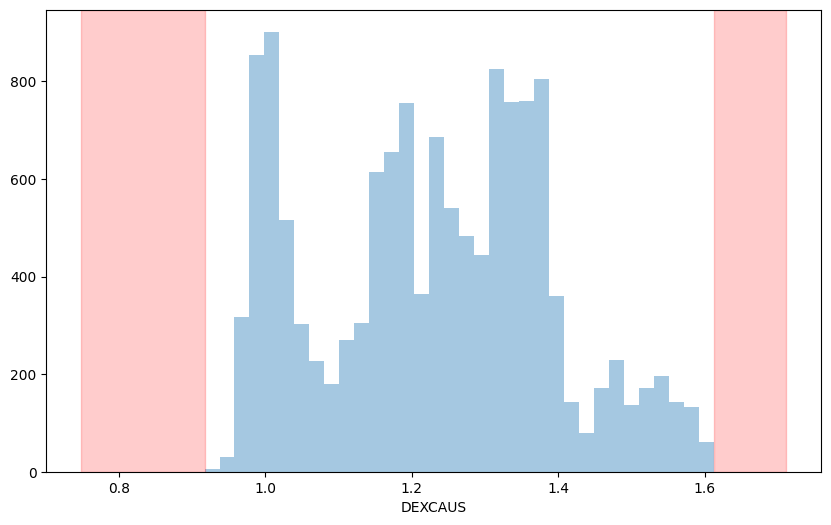

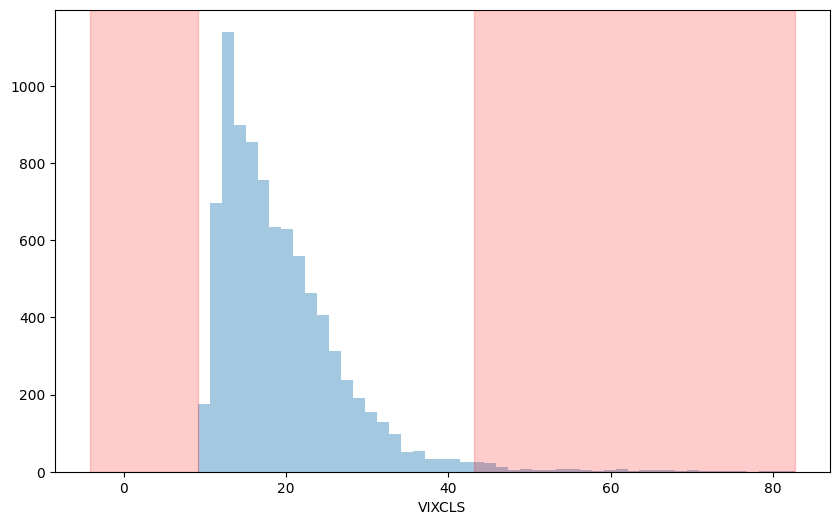

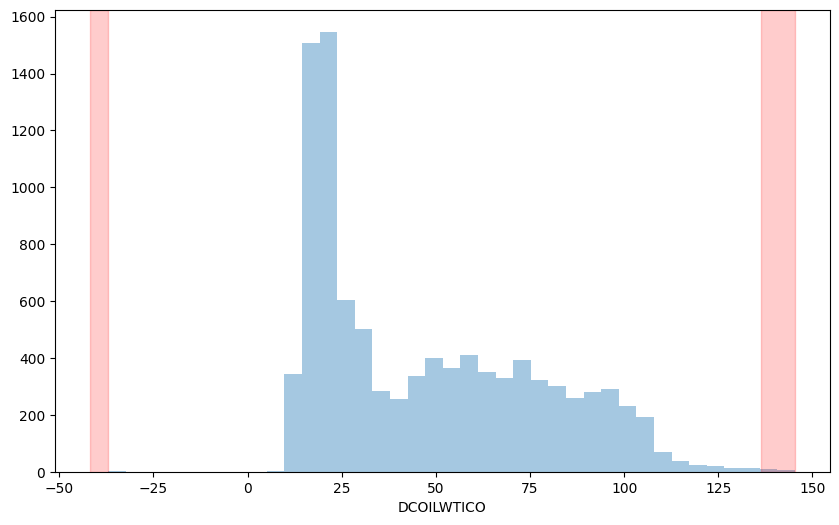

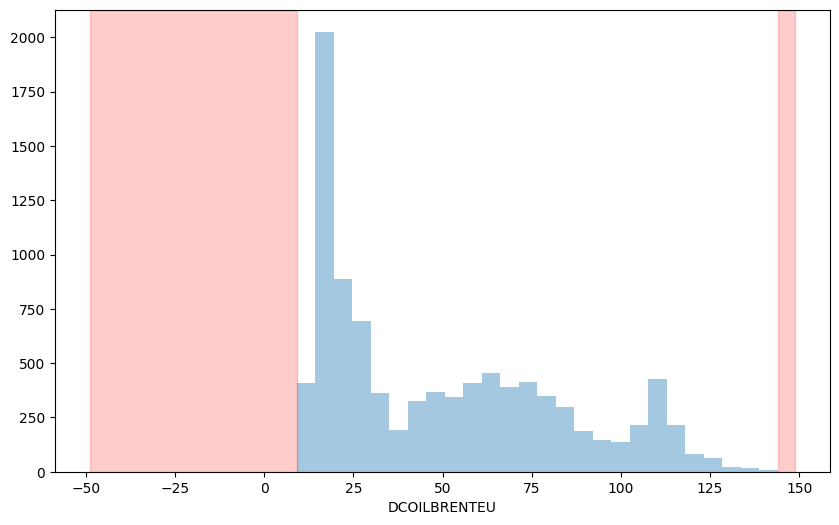

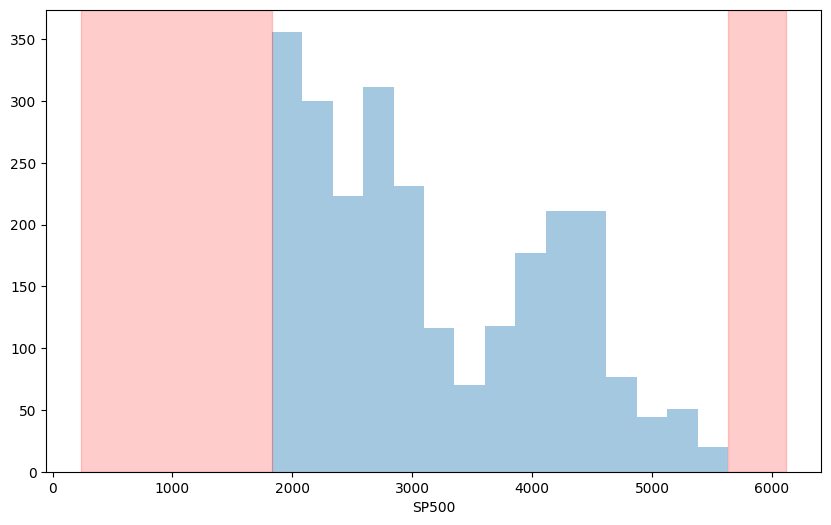

In [17]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

for col in fin_data.columns:
    out_std(fin_data, col)

    plt.figure(figsize = (10,6))
    sns.distplot(fin_data[col], kde=False)
    plt.axvspan(xmin = lower,xmax= fin_data[col].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= fin_data[col].max(),alpha=0.2, color='red')

# **Handling missing values and Step 6**

In [18]:
clean_filtered_macrodata = df_new[df_new.index > '2000-01-01']
for col in clean_filtered_macrodata.columns:
    #Data Frame without outliers
    clean_filtered_macrodata = clean_filtered_macrodata[(clean_filtered_macrodata[col] > lower)  & (clean_filtered_macrodata[col] < upper) ]
clean_filtered_macrodata.dropna()

Empty DataFrame
Columns: [WTISPLC, CPIENGSL, CAPG211S, CAPUTLG211S, IPG211S, INDPRO, IPN213111N, PCU211211]
Index: []

In [19]:
clean_filtered_fin_data = fin_data[fin_data.index > '2000-01-01']

for col in clean_filtered_fin_data.columns:
    out_std(clean_filtered_fin_data, col)
    clean_filtered_fin_data = clean_filtered_fin_data[(clean_filtered_fin_data[col] > lower)  & (clean_filtered_fin_data[col] < upper) ]

clean_filtered_fin_data

The lower bound value is 0.7383116741499283
The upper bound value is 1.754145663956157
Total number of outliers are 0
The lower bound value is -5.619809271550544
The upper bound value is 45.44014309580189
Total number of outliers are 102
The lower bound value is -13.297905292740182
The upper bound value is 140.99957836003023
Total number of outliers are 8
The lower bound value is -20.30716118329657
The upper bound value is 153.93805280642147
Total number of outliers are 0
The lower bound value is 241.3547172663093
The upper bound value is 6106.041783351229
Total number of outliers are 0


DEXCAUS  VIXCLS  DCOILWTICO  DCOILBRENTEU    SP500
2014-07-14   1.0721   11.82      101.73        104.73  1977.10
2014-07-15   1.0766   11.96      100.56        104.73  1973.28
2014-07-16   1.0749   11.00      101.88        105.41  1981.57
2014-07-17   1.0753   14.54      103.84        106.04  1958.12
2014-07-18   1.0737   12.06      103.83        106.03  1978.22
...             ...     ...         ...           ...      ...
2024-06-28   1.3684   12.44       82.83         87.26  5460.48
2024-07-01   1.3742   12.22       84.70         86.57  5475.09
2024-07-02   1.3691   12.03       84.09         88.28  5509.01
2024-07-03   1.3624   12.09       85.19         88.25  5537.02
2024-07-05   1.3631   12.48       84.44         88.66  5567.19

[2429 rows x 5 columns]

In [20]:
clean_filtered_fin_data.isnull().sum()

DEXCAUS         0
VIXCLS          0
DCOILWTICO      0
DCOILBRENTEU    0
SP500           0
dtype: int64

We are filthering all the data before 01.01.2000 and from now on we are going to work with only the data after 2000 because we think that this timeframe is big enough and also this are the most recent 24 years that do have the most and recent important impact over history and the corresponding price action.
In order to to get rid of the outliers we are applying the 3 standard deviation outlier detection method and after this we are dropping the data point that are outside of the 3 standard eviation metric. After this we check for null data and we gladly find out that there is not so no further imputation is needed.


# **Step 7**

# Distributional plots of Macroeconomic Data

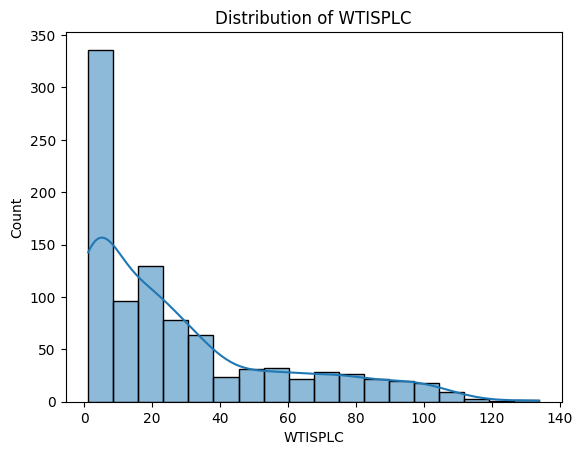

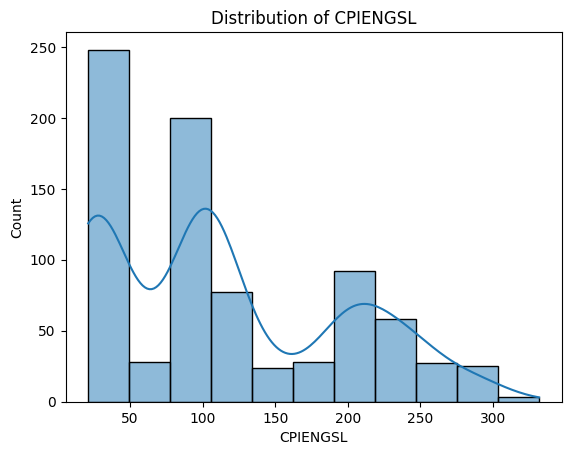

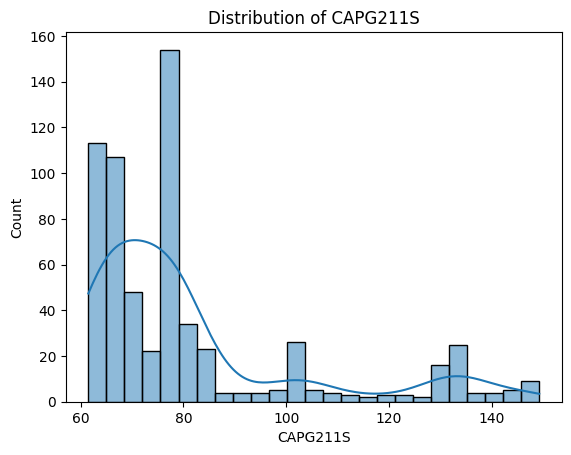

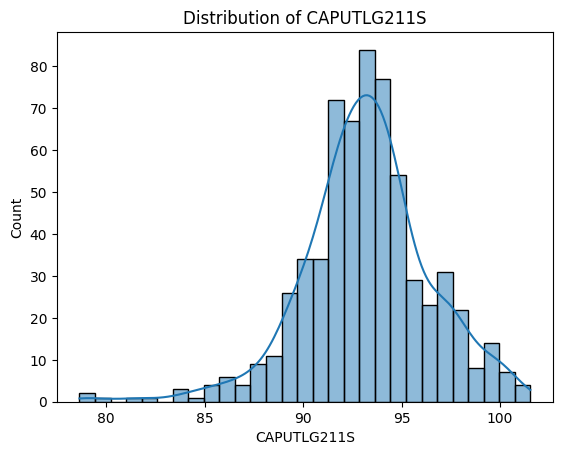

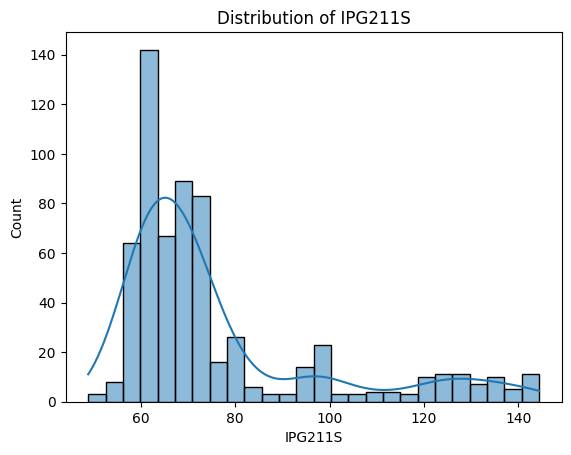

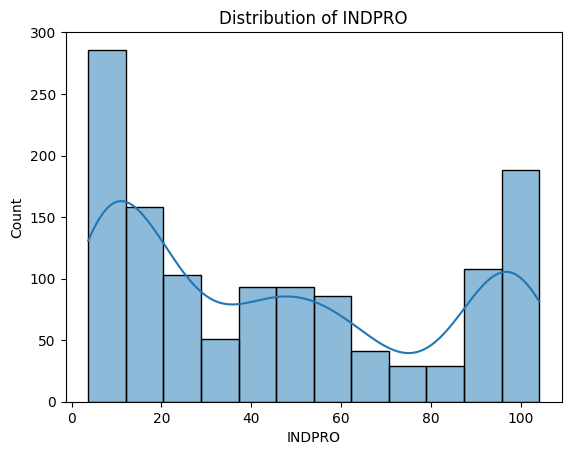

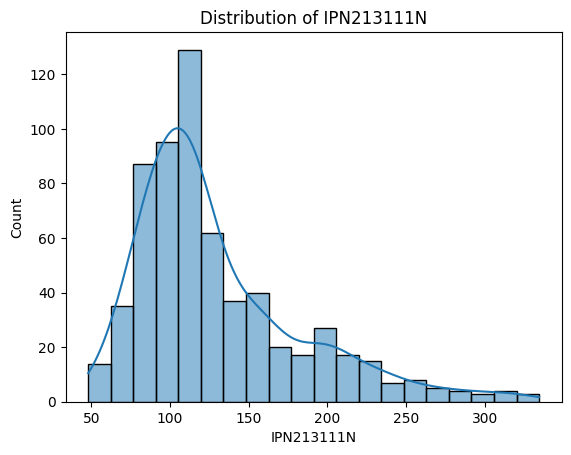

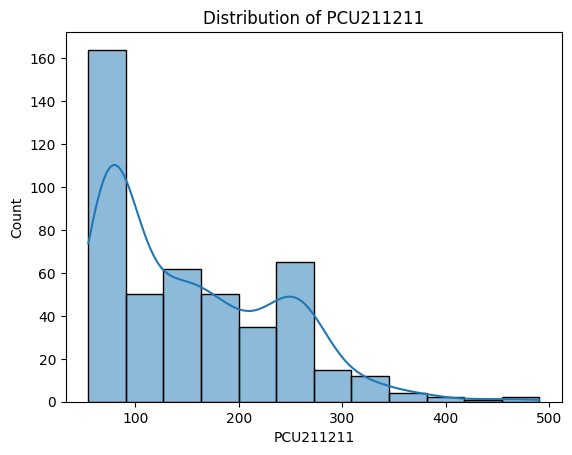

In [21]:
# Distribution of each variable
for col in data_merge.columns:
    plt.figure()
    sns.histplot(data_merge[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

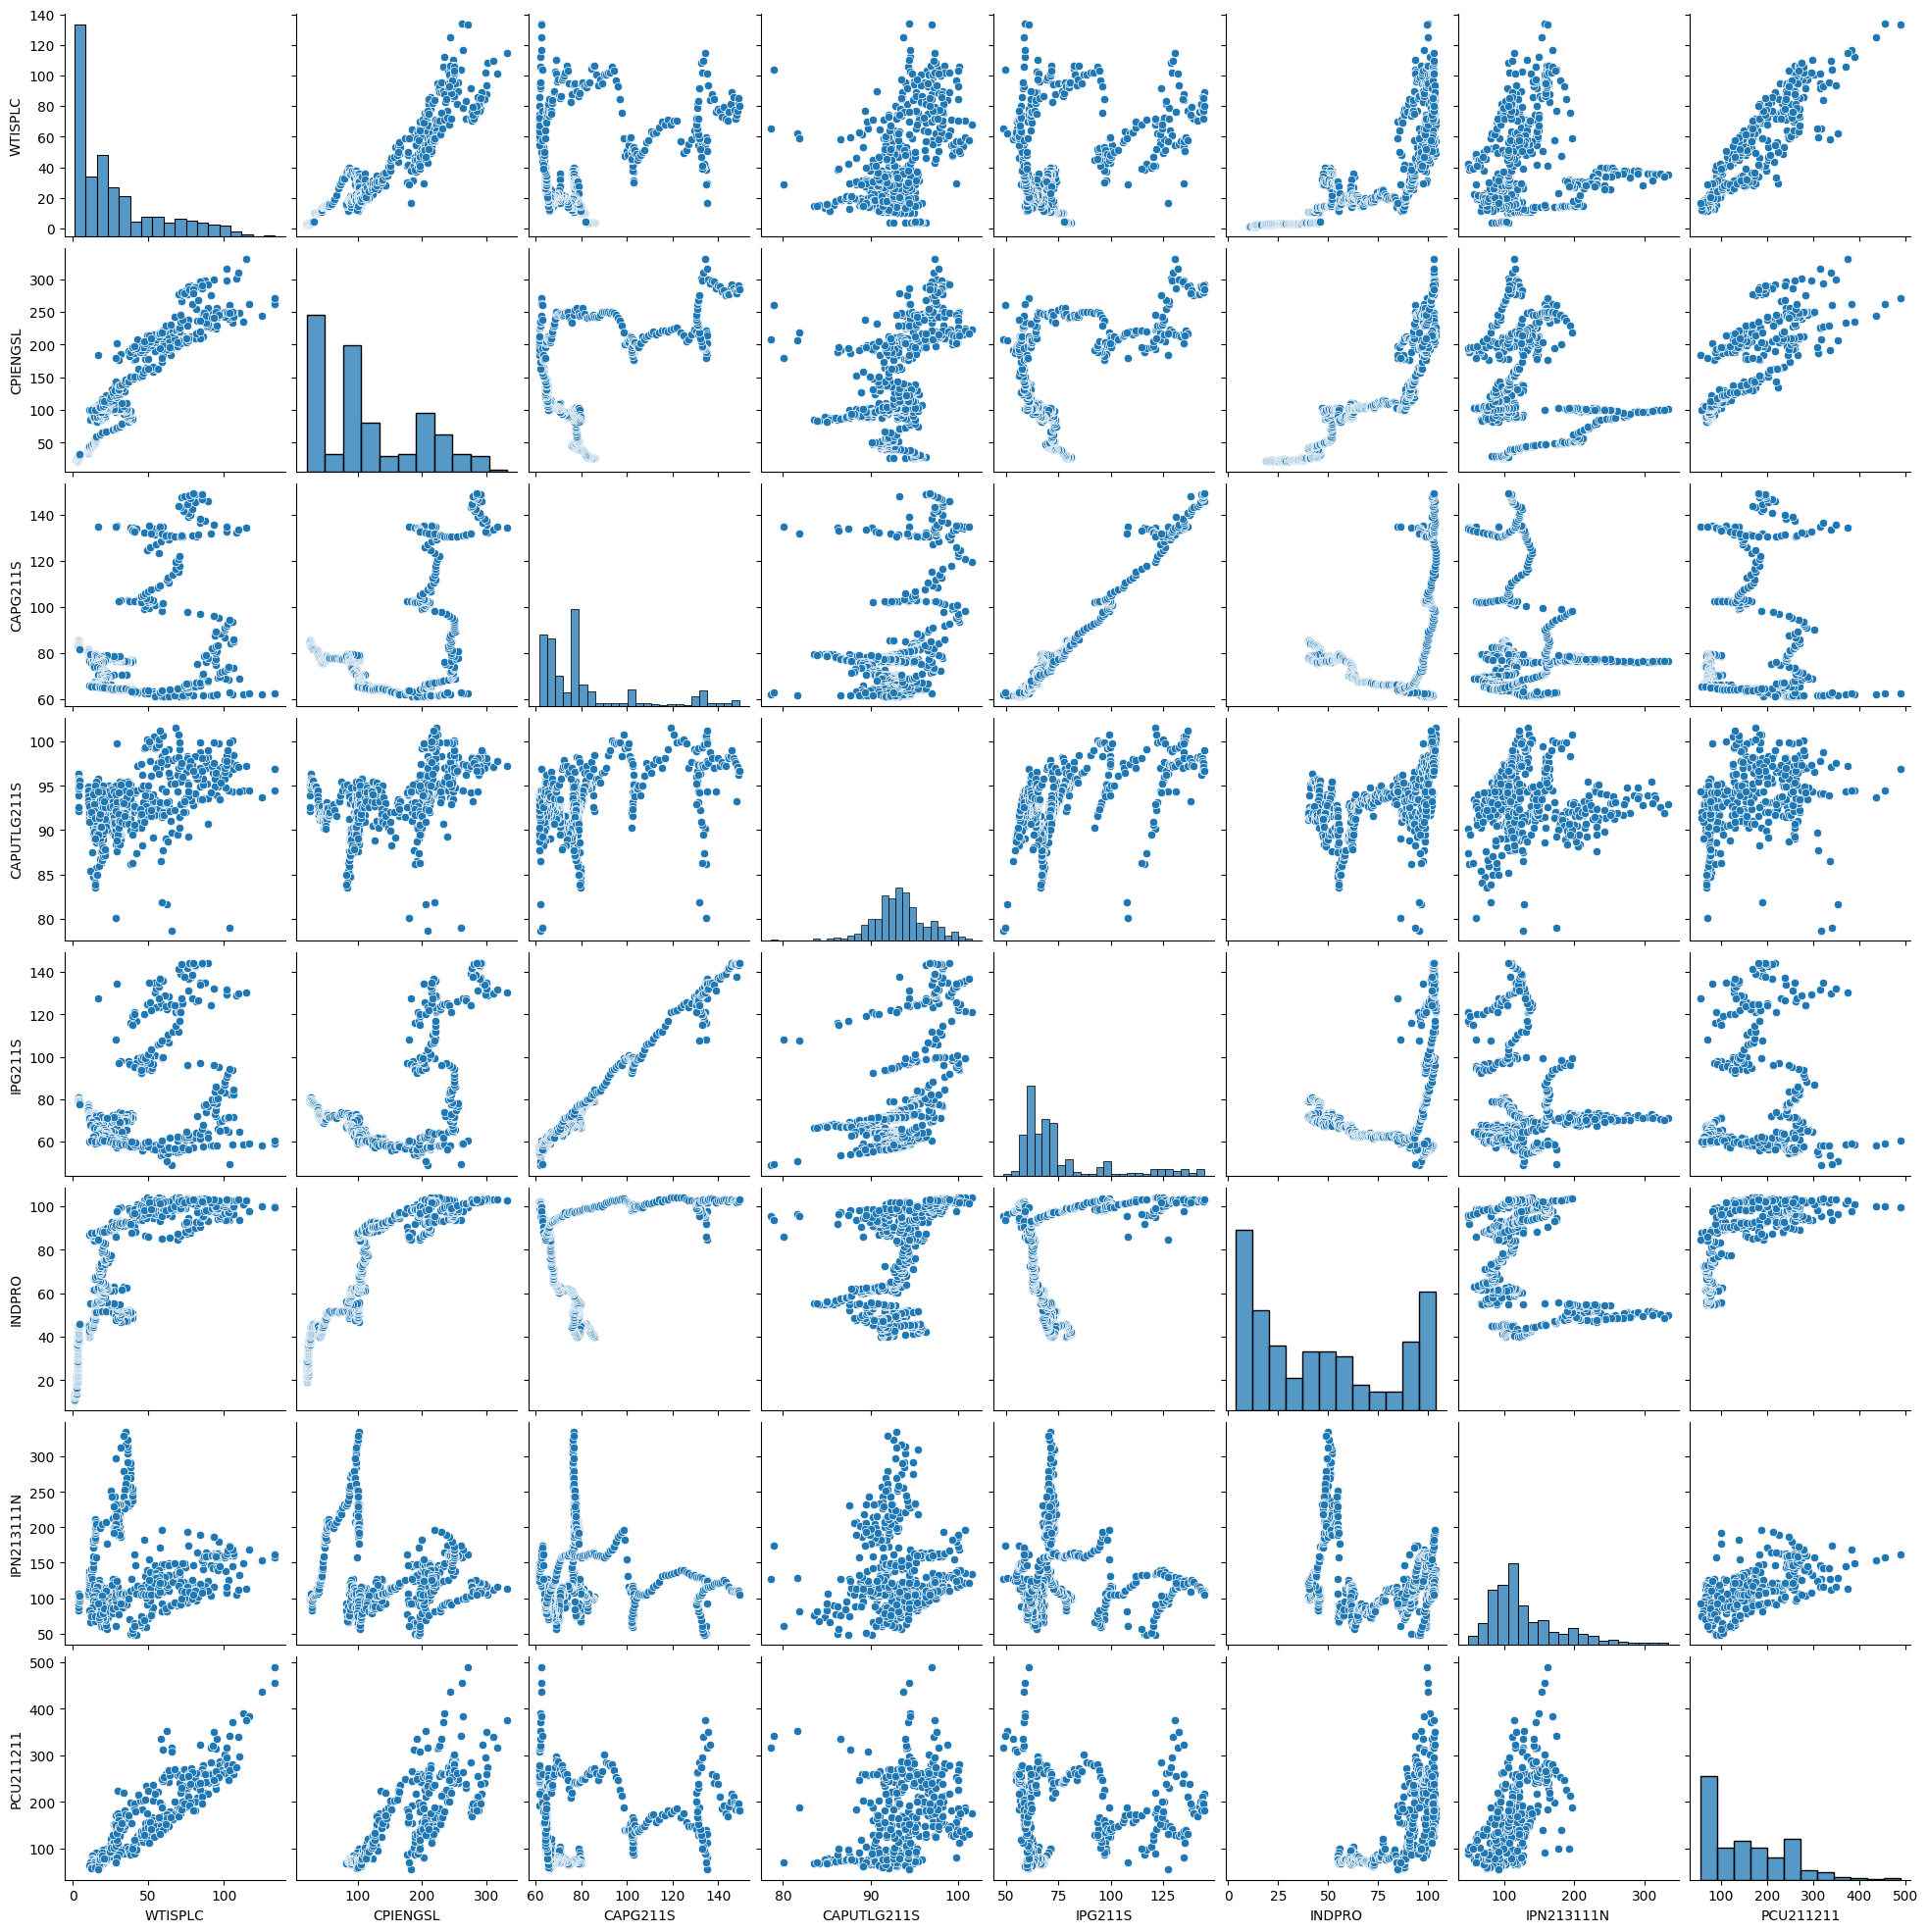

In [22]:
# Scatter plot matrix
sns.pairplot(data_merge)
plt.show()

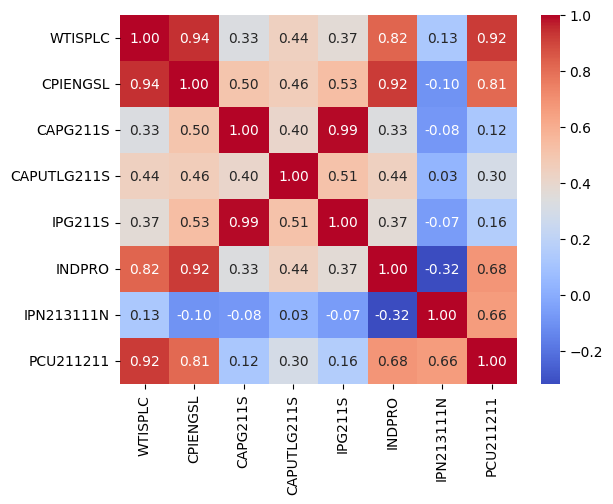

In [23]:
# Correlation matrix
corr_matrix = data_merge.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Time Series plot of Macroeconomic Data

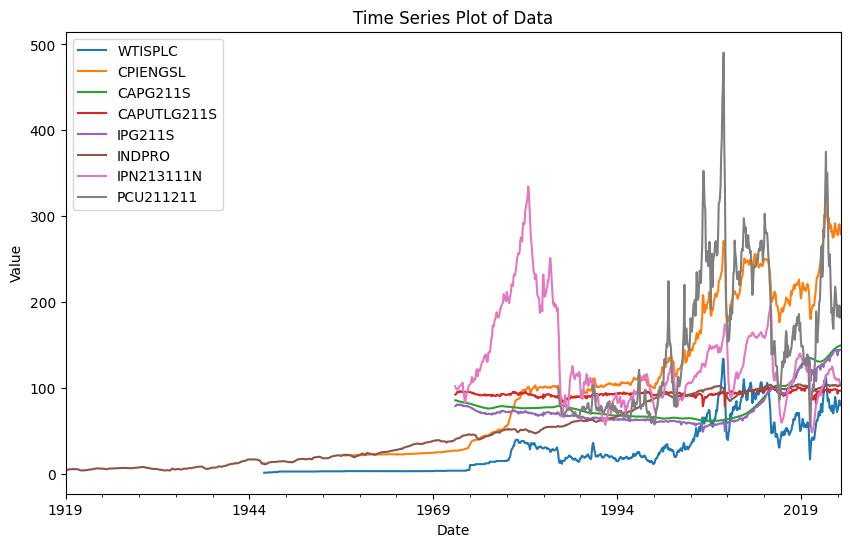

In [24]:
# Time series plot
data_merge.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Time Series Plot of Data")
plt.show()

In [25]:
'WTISPLC',    # Spot Crude Oil Price: West Texas Intermediate (WTI) (WTISPLC)
'CPIENGSL', # Consumer Price Index for All Urban Consumers: Energy in U.S. City Average
'CAPG211S', # Industrial Capacity: Mining: Oil and Gas Extraction (NAICS = 211)
'CAPUTLG211S', #  Capacity Utilization: Mining: Oil and Gas Extraction (NAICS = 211)
'IPG211S', # Industrial Production Index: Mining: Oil and Gas Extraction (NAICS = 211)
'INDPRO', #  Industrial Production: Total Index
'IPN213111N', # Industrial Production: Mining: Drilling Oil and Gas Wells
'PCU211211', # Producer Price Index: Mining: Oil and Gas Extraction (NAICS = 211)

('PCU211211',)

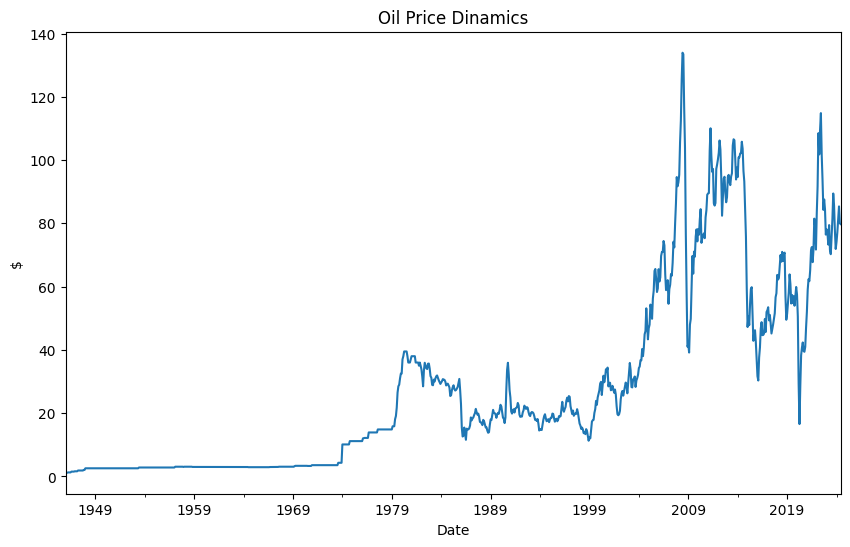

In [26]:
# Time series plot
data_merge['WTISPLC'].dropna().plot(figsize=(10, 6))  # Spot Crude Oil Price: West Texas Intermediate (WTI) (WTISPLC)
plt.xlabel("Date")
plt.ylabel("$")
plt.title("Oil Price Dinamics")
plt.show()

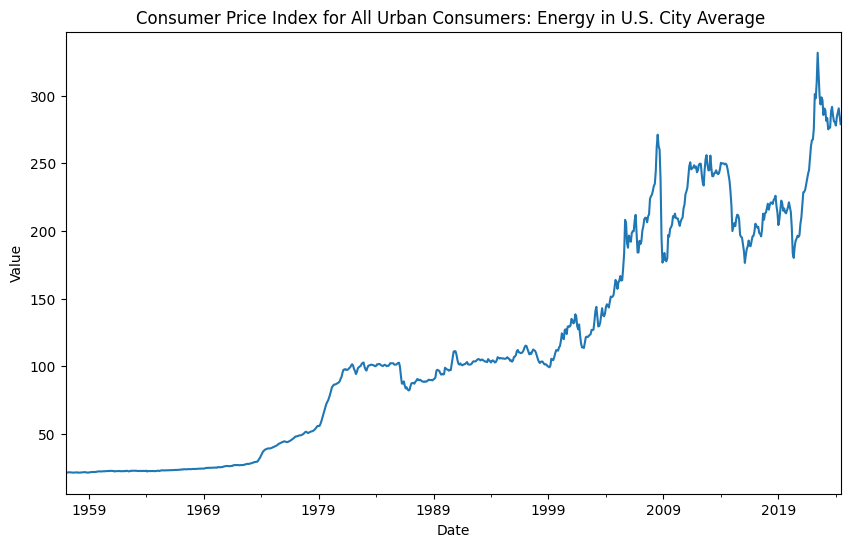

In [27]:
# Time series plot
data_merge['CPIENGSL'].dropna().plot(figsize=(10, 6)) # Consumer Price Index for All Urban Consumers: Energy in U.S. City Average
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Consumer Price Index for All Urban Consumers: Energy in U.S. City Average ")
plt.show()

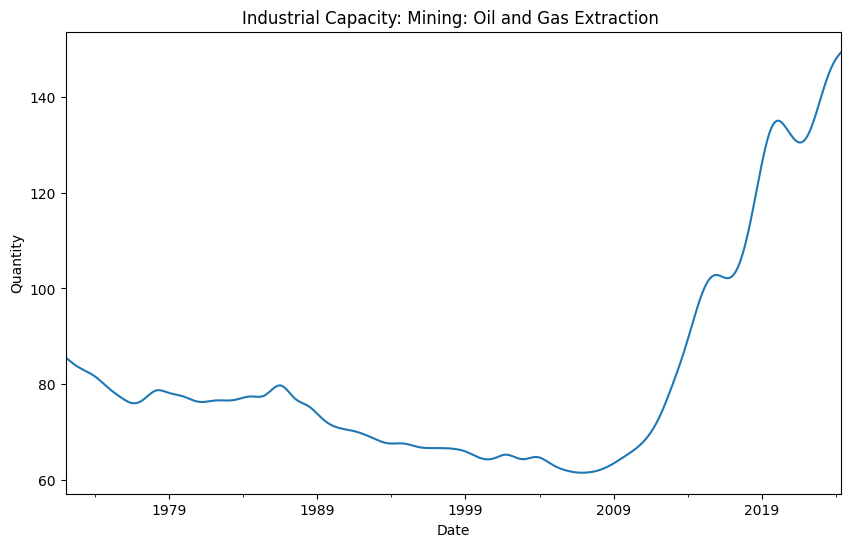

In [28]:
# Time series plot
data_merge['CAPG211S'].dropna().plot(figsize=(10, 6)) # Industrial Capacity: Mining: Oil and Gas Extraction (NAICS = 211)
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Industrial Capacity: Mining: Oil and Gas Extraction ")
plt.show()

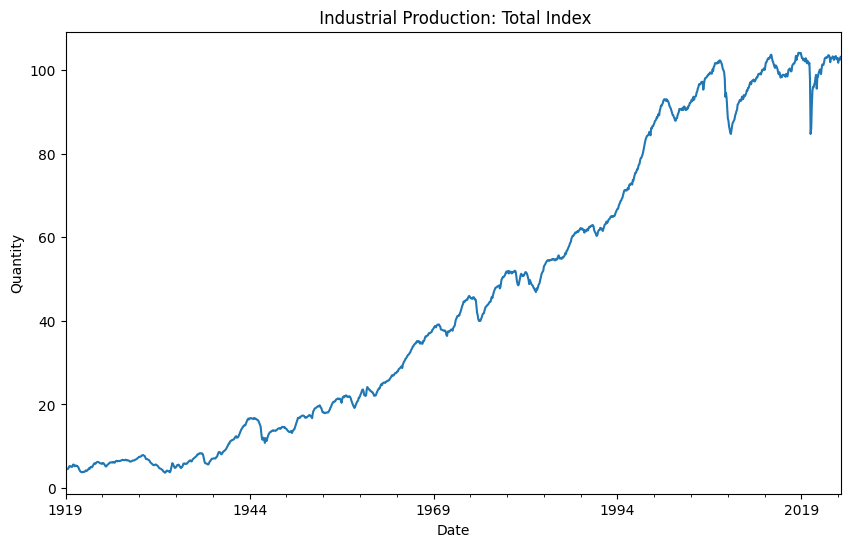

In [29]:
# Time series plot
data_merge['INDPRO'].dropna().plot(figsize=(10, 6))  #  Industrial Production: Total Index
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title(" Industrial Production: Total Index")
plt.show()

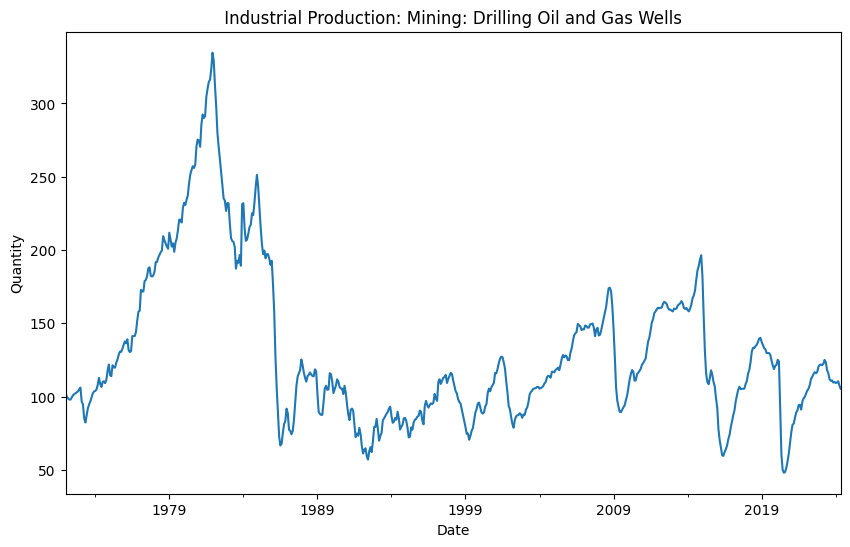

In [30]:
# Time series plot
data_merge['IPN213111N'].dropna().plot(figsize=(10, 6)) # Industrial Production: Mining: Drilling Oil and Gas Wells
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title(" Industrial Production: Mining: Drilling Oil and Gas Wells ")
plt.show()

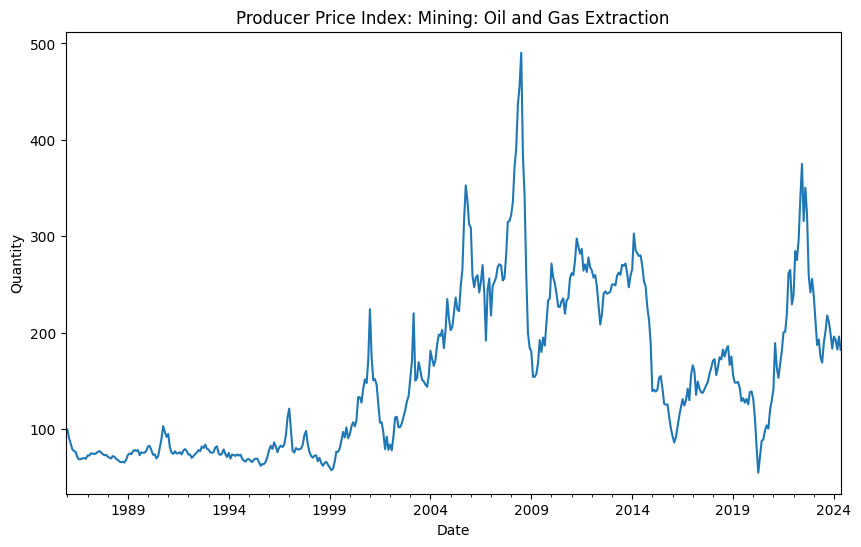

In [31]:
# Time series plot
data_merge['PCU211211'].dropna().plot(figsize=(10, 6)) # Producer Price Index: Mining: Oil and Gas Extraction (NAICS = 211)
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title("Producer Price Index: Mining: Oil and Gas Extraction")
plt.show()

# Distributional Plot of Financial Data

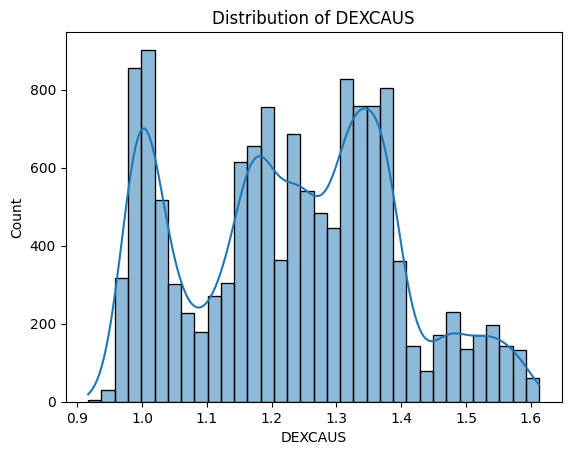

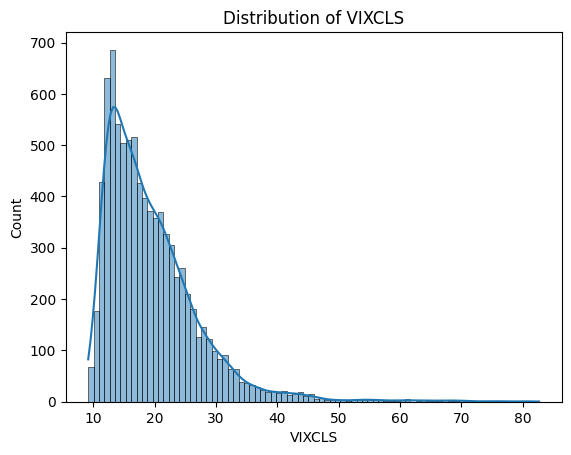

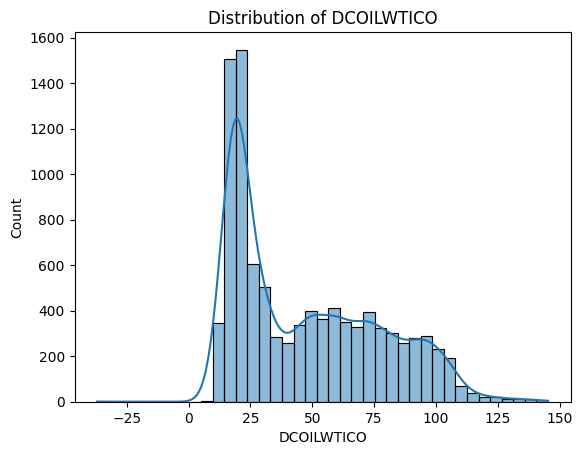

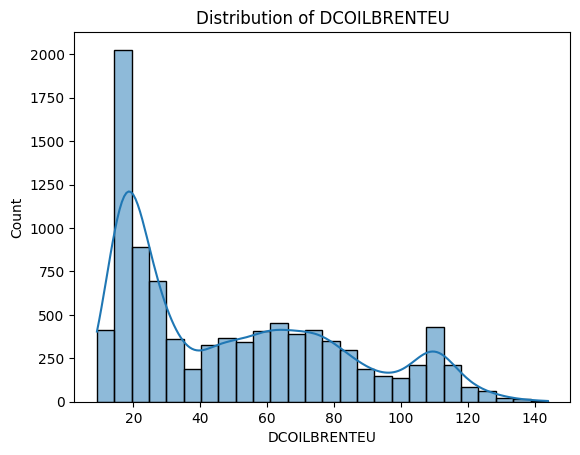

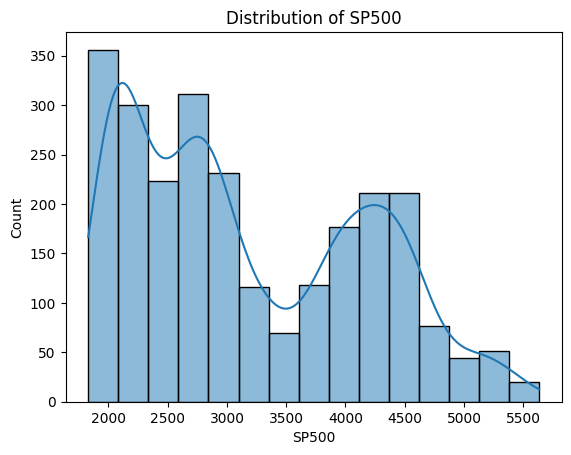

In [32]:
# Distribution of each variable
for col in fin_data.columns:
    plt.figure()
    sns.histplot(fin_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

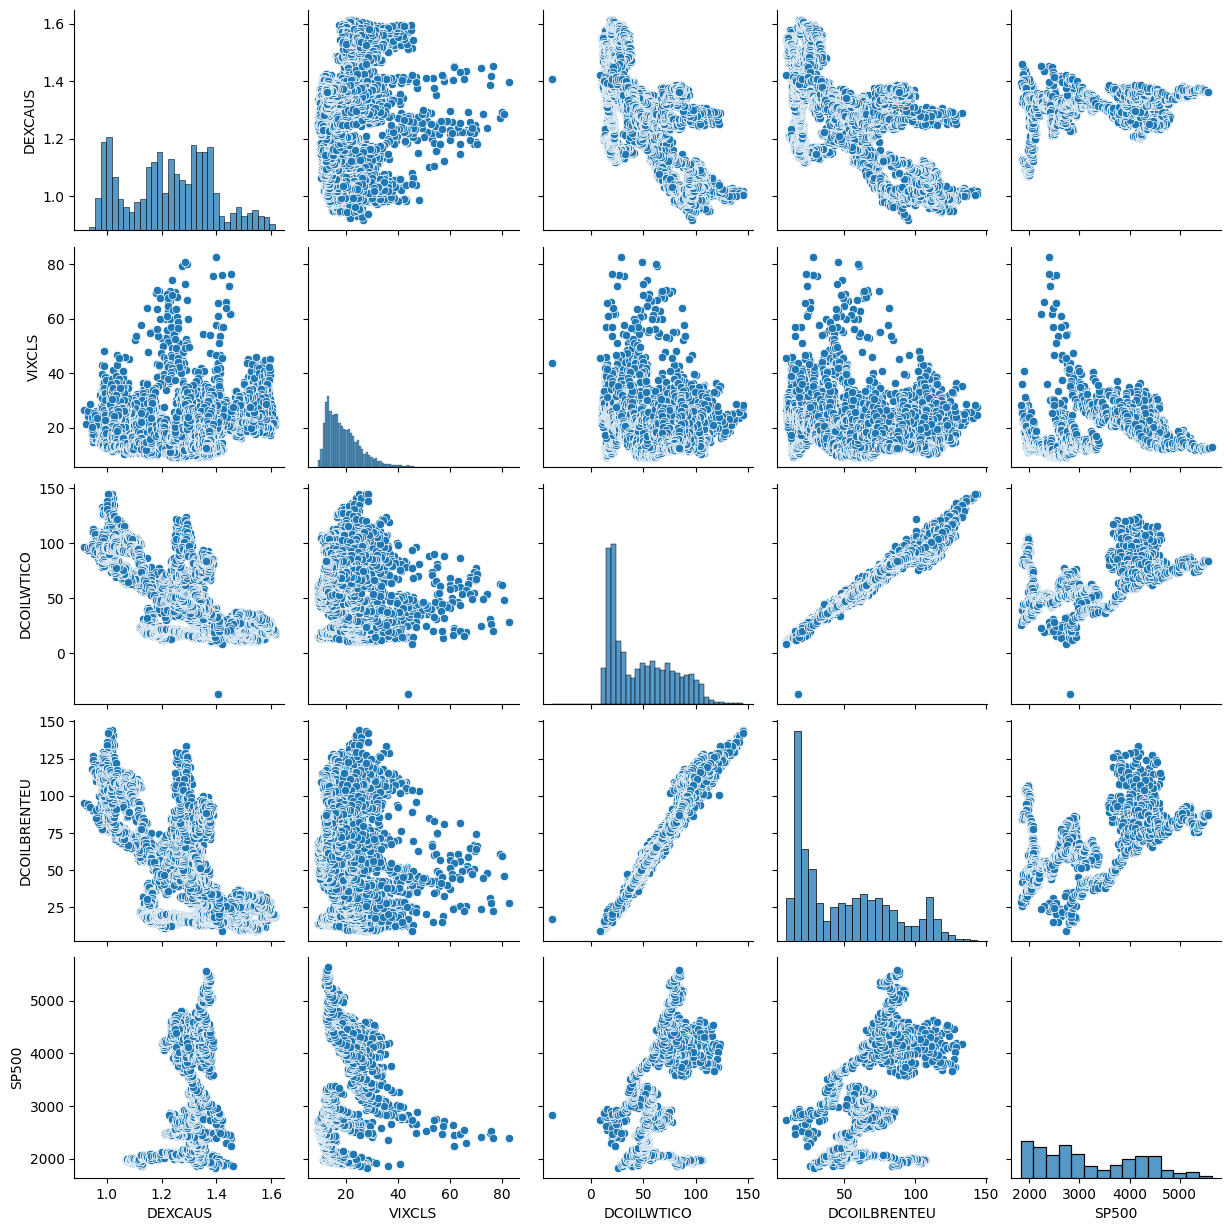

In [33]:
# Scatter plot matrix
sns.pairplot(fin_data)
plt.show()

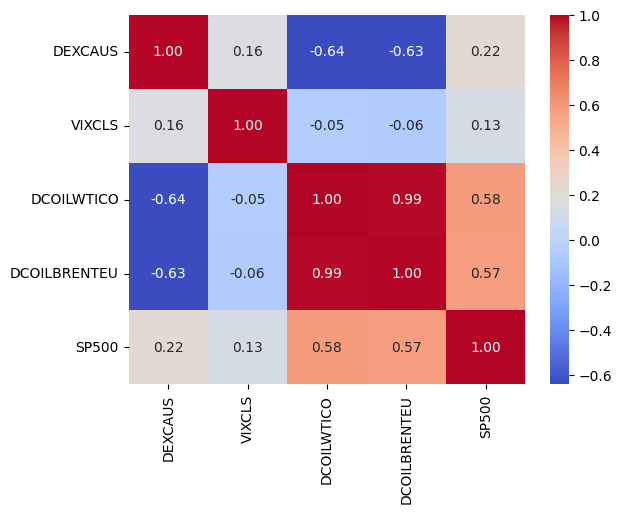

In [34]:
# Correlation matrix
corr_matrix = fin_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Time Series Plot of Financial Data

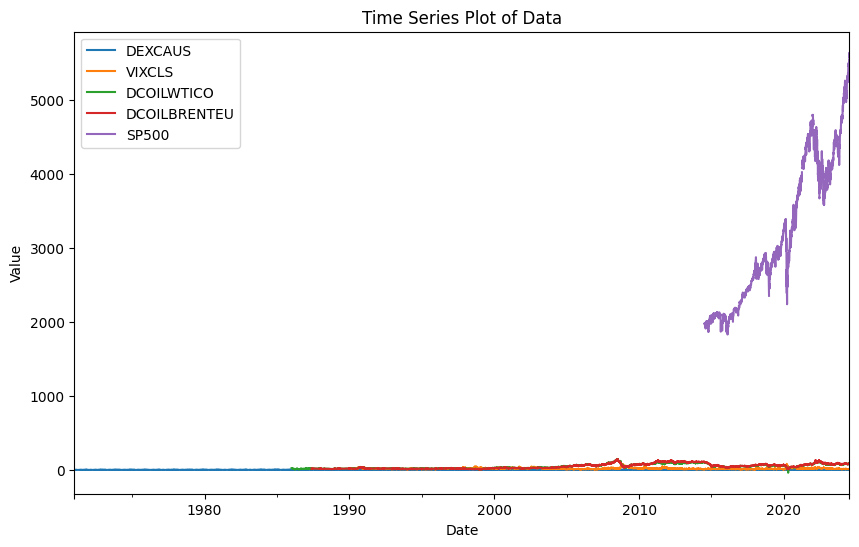

In [35]:
# Time series plot
fin_data.plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Time Series Plot of Data")
plt.show()

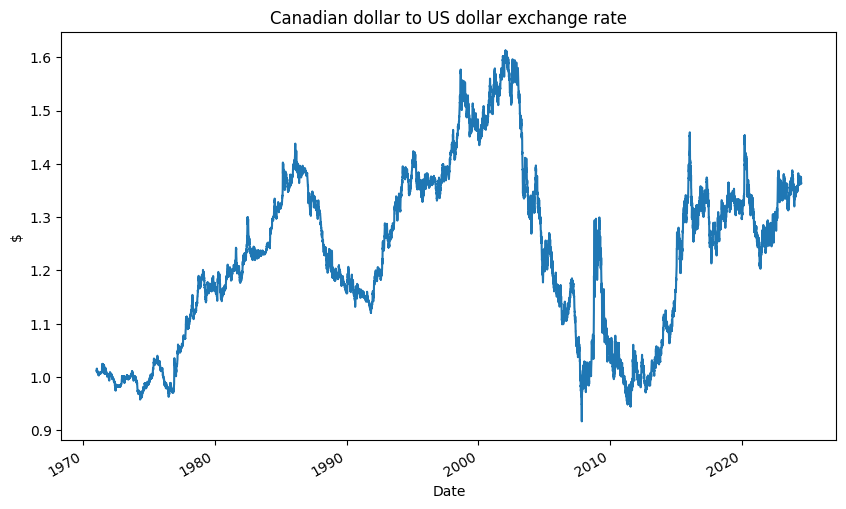

In [36]:
# Time series plot
fin_data['DEXCAUS'].dropna().plot(figsize=(10, 6))  # Canadian dollar to US dollar exchange rate
plt.xlabel("Date")
plt.ylabel("$")
plt.title("Canadian dollar to US dollar exchange rate")
plt.show()

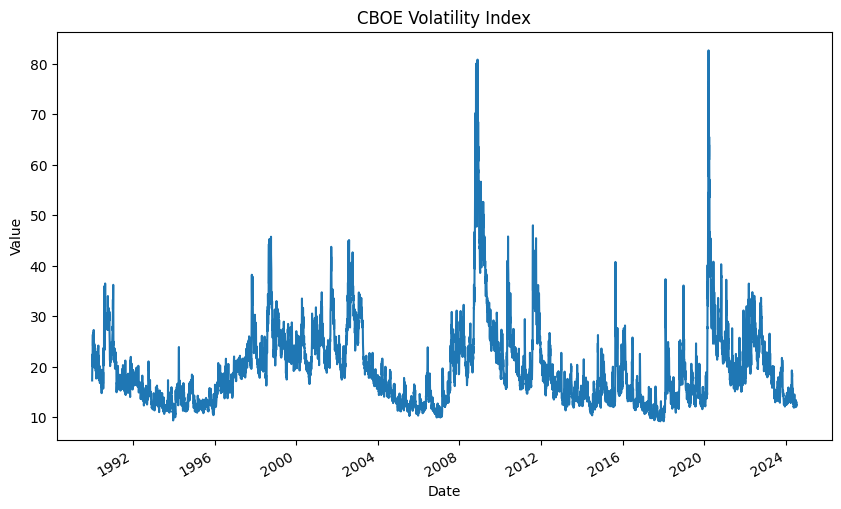

In [37]:
# Time series plot
fin_data['VIXCLS'].dropna().plot(figsize=(10, 6))  # CBOE Volatility Index
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("CBOE Volatility Index")
plt.show()

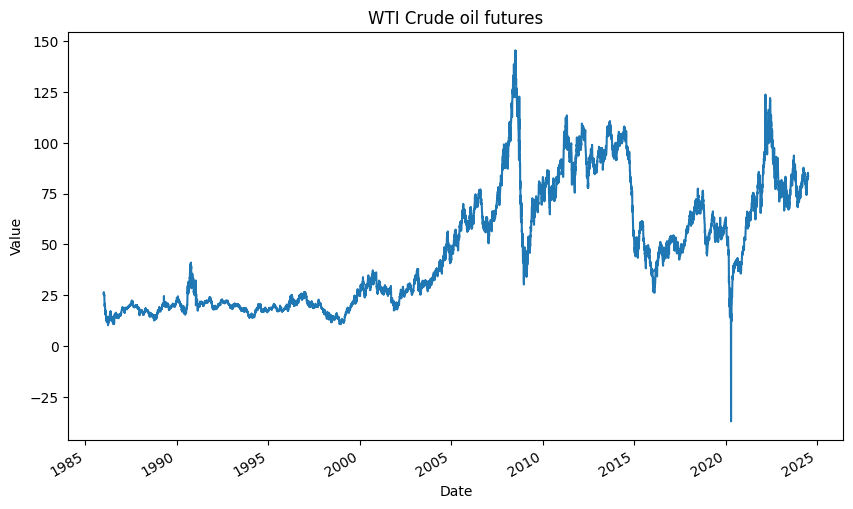

In [38]:
# Time series plot
fin_data['DCOILWTICO'].dropna().plot(figsize=(10, 6))  # WTI Crude oil futures
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("WTI Crude oil futures")
plt.show()

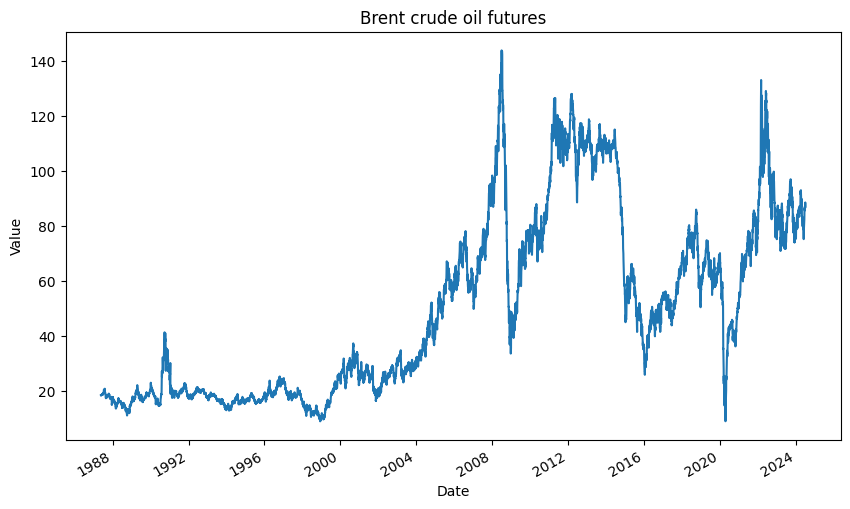

In [39]:
# Time series plot
fin_data['DCOILBRENTEU'].dropna().plot(figsize=(10, 6))  # Brent crude oil futures
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Brent crude oil futures")
plt.show()

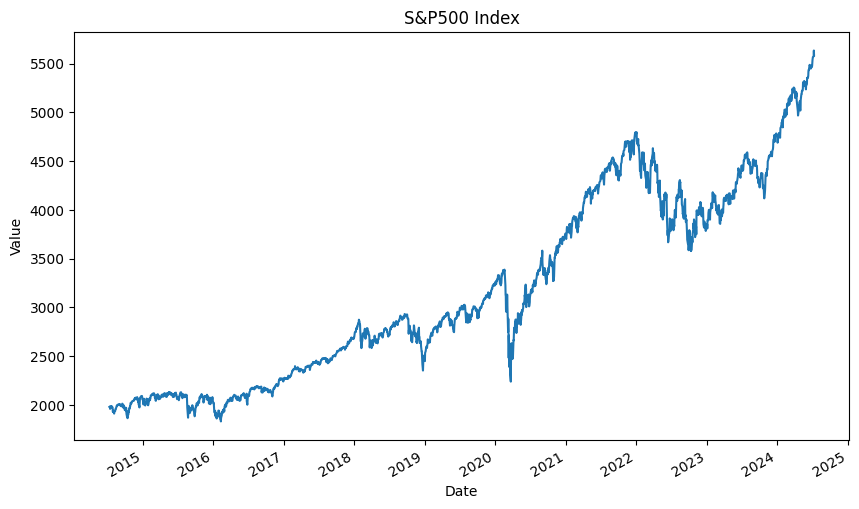

In [40]:
# Time series plot
fin_data['SP500'].dropna().plot(figsize=(10, 6))  # S&P500 Index
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("S&P500 Index")
plt.show()

# **Step 8**

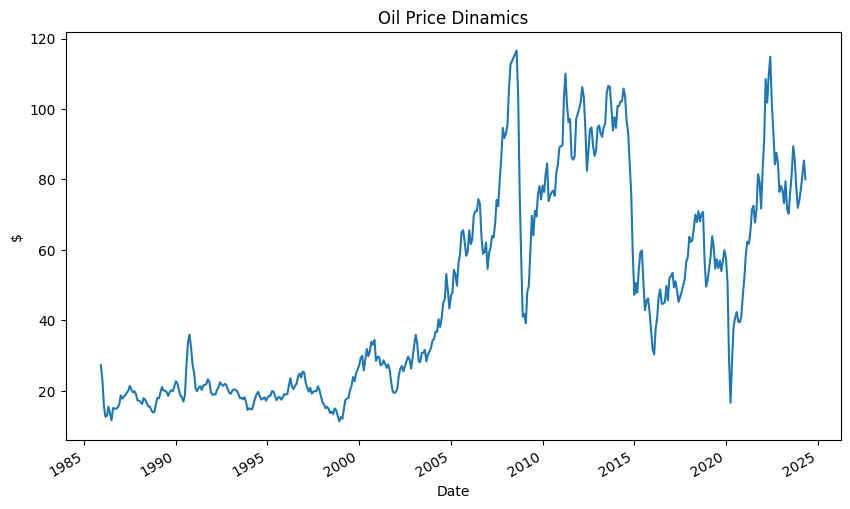

In [63]:
# Time series plot
df_new['WTISPLC'].plot(figsize=(10, 6))  # Spot Crude Oil Price: West Texas Intermediate (WTI) (WTISPLC)
plt.xlabel("Date")
plt.ylabel("$")
plt.title("Oil Price Dinamics")
plt.show()

We see that the for the period 2000 - 2024 Oil price is locked in a very big range from \$20 till \$140 with big spikes and steep declines as well. Usually the big spikes are at periods of booming economy and afterwards followed by crisis that are known with low consumption of oil so it is quite normal for prices to normalize and fall down. Such booming economy periods are 2002 - 2008, 2010 - 2012, 2020 - 2023 and they are followoed crisis (2008 - 2009 The Gread Financial Crisis, 2015-2016, 2019-2020 Covid19) and step decline in demand for oil.

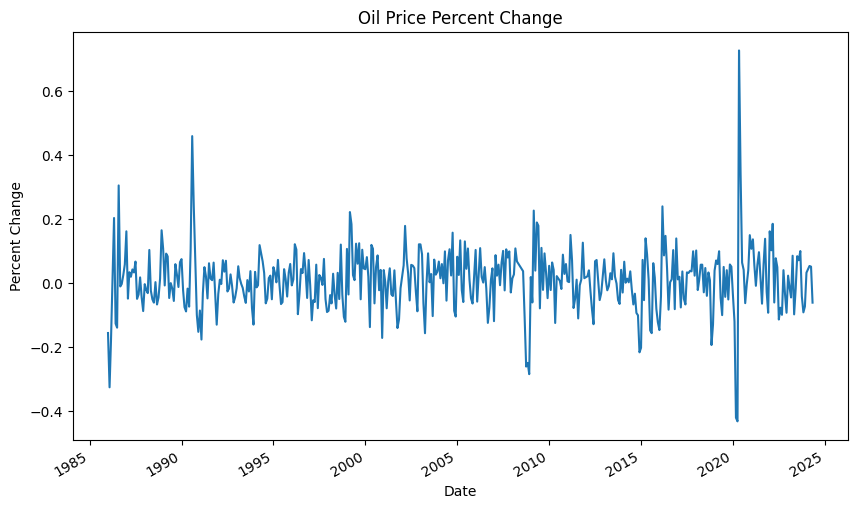

In [64]:
df_new['WTISPLC'].pct_change().plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Percent Change")
plt.title("Oil Price Percent Change")
plt.show()

We can say that the plot of Oil prices returns for the period 2000 - 2024 look quite normal (but we have to check it with some statistical methods) with the biggest spike arround Covid19. Lets look at the bigger picture: all the data

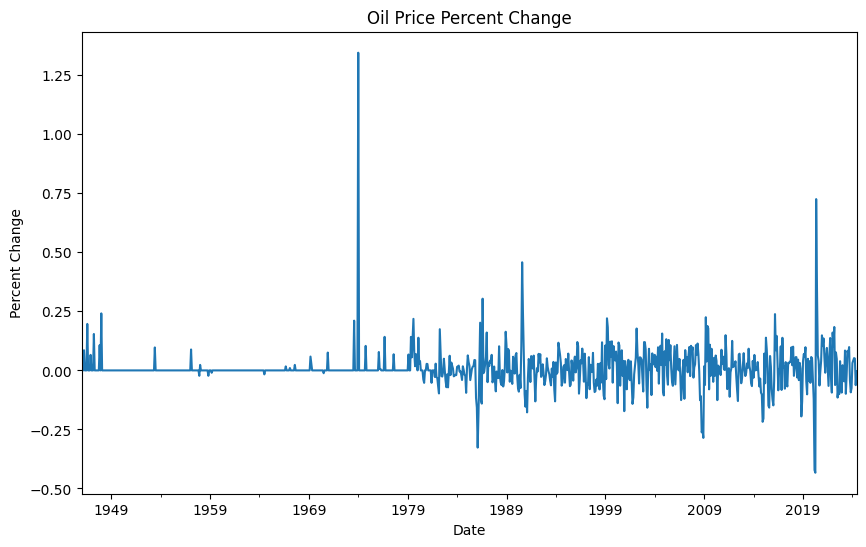

In [43]:
data_merge['WTISPLC'].dropna().pct_change().plot(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Percent Change")
plt.title("Oil Price Percent Change")
plt.show()

The entire Oil returns data show a more ugly picture with a lot more spikes. Lets see the ACF and Pacf plots for more insights

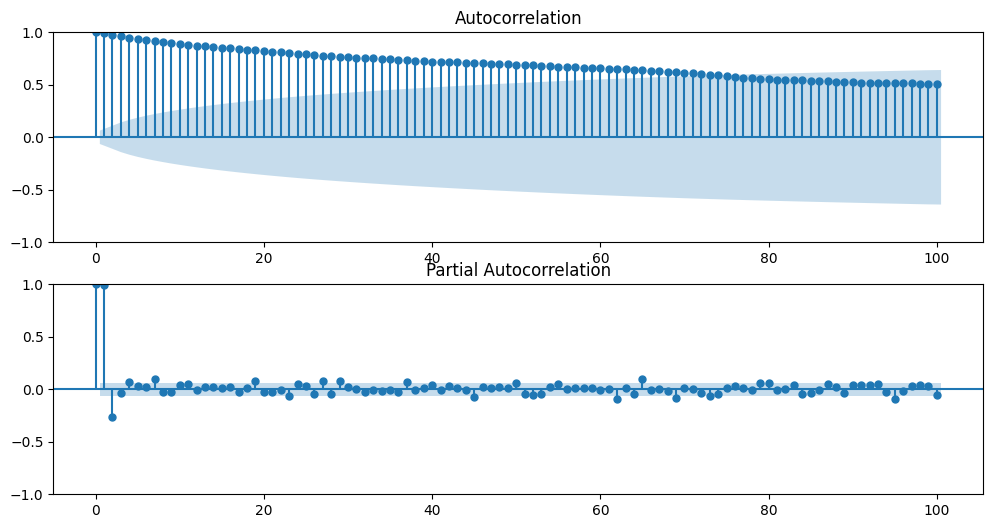

In [44]:
# Create the plots
fig, axes = plt.subplots(2, figsize=(12,6))
plot_acf(data_merge['WTISPLC'].dropna(), lags=100, ax=axes[0])
plot_pacf(data_merge['WTISPLC'].dropna(), lags=100, ax=axes[1])
plt.show()

From the ACF plot we can see that there is trend in the Oil price, which is quite normal as everithing with time goes uo thanks to the inflation (a totally normal process). The interesting thing is the PACF where we can see that there is a seasonality pathern where we can see that at the begining of the year there is a downward spike (during the northern globe is winter and since there is most of the population located and the fact that it is winter suggests that there is also a lower demand for Oil) and also during the summer of the year (I am talking about the northern globe seasons ) then an upward spike in the Oil consumption because it is summer time and a lot of traweling is happening at this time of the year

In [45]:
# Perform ADF test
print('Results of ADF Test:')
# Replace infinite or nan values with finite numbers
data_merge['WTISPLC'] = data_merge['WTISPLC'].replace([np.inf, -np.inf], np.nan).fillna(method='ffill')
# Calculate percentage change on the shifted series to avoid introducing NaNs
dftest = adfuller(data_merge['WTISPLC'].dropna().shift().pct_change().dropna())
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of ADF Test:
Test Statistic                -1.633727e+01
P-value                        3.020024e-29
#Lags Used                     3.000000e+00
Number of Observations Used    9.360000e+02
Critical Value (1%)           -3.437356e+00
Critical Value (5%)           -2.864633e+00
Critical Value (10%)          -2.568417e+00
dtype: float64


Here the ADF test's p-value of 3.020962e-29 proves that the data is it is very unlikely that the data has a unir root so the data is stationary

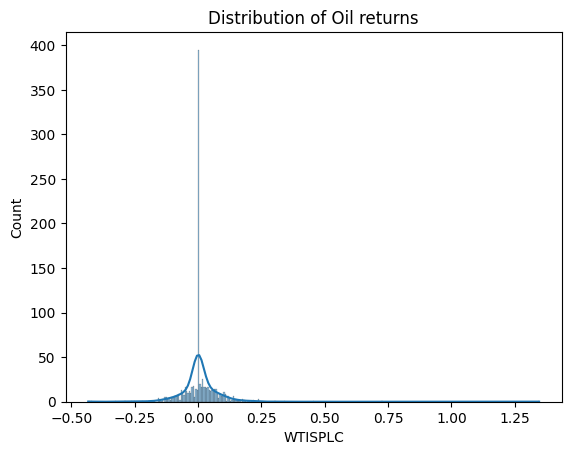

In [66]:
#
plt.figure()
sns.histplot(data_merge['WTISPLC'].dropna().pct_change(), kde=True)
plt.title(f"Distribution of Oil returns")
plt.show()

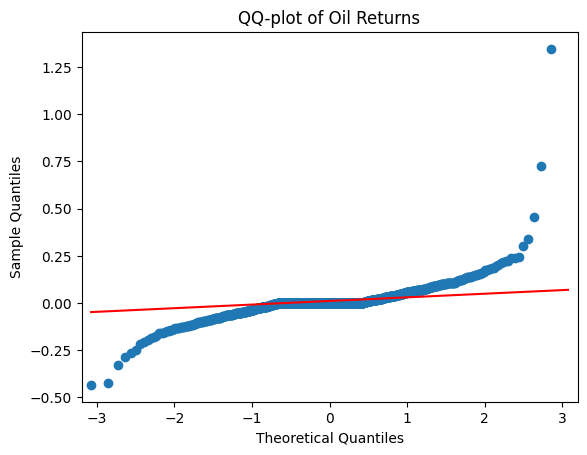

In [65]:
fig = sm.qqplot(data_merge['WTISPLC'].dropna().pct_change(), line='q')
plt.title('QQ-plot of Oil Returns')
plt.show()

Lets do some exploration about whether the Oil returns data is normally distributed and we are doing this by a QQ-plot that shows that the data has big tails and this suggest that overall the data may look like it is normally distributed by the bell shaped histogram plot. Actually it is not because of the fat tails. For better proove of this hypothesis we will do the statistical test for normallity check called Shapiro-Wilk test for normallity. This will undeniably prove or deny the hipothesis mentioned above

In [48]:
# Shapiro-Wilk Test
statistic, p_value = stats.shapiro(data_merge['WTISPLC'].dropna())
print('Shapiro-Wilk Test:')
print('Statistic:', statistic)
print('P-value:', p_value)

Shapiro-Wilk Test:
Statistic: 0.8222251534461975
P-value: 4.956003613292808e-31


Yet againd a p-value of 4.912296382340533e-31 for Shapiro-Wilk normallity test proves the the data is not normally distributed. With such a small p-value we cannot accept the null hypothesis (which suggests that the data is normally distributed) so in this case we fail to accept it and we can say that we have statistically proved that the data is NOT normally distributed.
Something else is very interesting and it is the statistic= 0.822 for simularity to a normal distribution. This suggest that the data is close to a normal distributio (the bell shape) but the fat tails fails this thesis

In [49]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test up to lag 10
result = acorr_ljungbox(data_merge['WTISPLC'].dropna(), lags=10)

print(result)

        lb_stat      lb_pvalue
1    928.818987  5.333691e-204
2   1834.309316   0.000000e+00
3   2713.712826   0.000000e+00
4   3568.678890   0.000000e+00
5   4401.499486   0.000000e+00
6   5214.266084   0.000000e+00
7   6010.910499   0.000000e+00
8   6792.604186   0.000000e+00
9   7559.300054   0.000000e+00
10  8311.736911   0.000000e+00


With Ljung-Box Test we check for autocorrelation and prove that there is such with lag of 1. (The lag 1 p-value of Ljung-Box Test is: 6.392185e-204 which is a lot lower than 0.05 ). This is also visible in the PACF plot but it is good to have it statistically proven

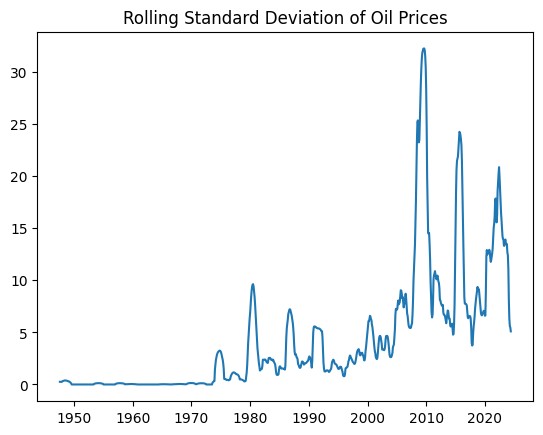

In [50]:
data = data_merge['WTISPLC'].dropna()

# Calculate and plot rolling standard deviation (e.g., 20-period window)
rolling_std = data.rolling(window=20).std()
plt.plot(rolling_std)
plt.title('Rolling Standard Deviation of Oil Prices')
plt.show()

It is quite normal for Oil prices to have big spikes in volatility (expecially in war time periods) but also a big trough are quite normal at time of crisis where the demand and usage of oil is much lower than normally like in the 2008 Financial crisis and the Covid19 as well. So with the plot of the Rolling Standard Deviation of Oil Prices we can see exactly that: volatility clustering arround periods of boom and bust (economy progress and crisis)